In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [57]:
from shingle import *
from text import *
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import gc
plt.style.use("ggplot")

# Utility Functions

In [3]:
def merge(texts):
        res = ""
        for text in texts:
            res = res +" "+ text
        return res.strip()
    
def trn_tst(dataframe, trn_p=0.8):
    trn_df = pd.DataFrame()
    tst_df = pd.DataFrame()
    trn_txt = []
    tst_txt = []
    for text in dataframe.text:
        lst = text.split(" ")
        len_ = len(lst)
        trn_txt.append(merge(lst[:int(trn_p*len_)]))
        tst_txt.append(merge(lst[int(trn_p*len_):]))
        
    trn_df['text'] = trn_txt
    tst_df['text'] = tst_txt
        
    trn_df['label'] = dataframe.label
    tst_df['label'] = dataframe.label
    return trn_df, tst_df

# Create Train and Test DataFrames

In [4]:
%%time
# create dataframe for train and test
data = create_dataframe(labels, max_words=50000)
data.shape

reading dataset files using one process.....
dataframe creation with 50000 words ends in 4.000000s.
Wall time: 4.47 s


(21, 2)

In [5]:
data.columns

Index(['text', 'label'], dtype='object')

In [6]:
data.label.replace([i for i in range(len(labels))], labels, inplace=True)

In [7]:
trn_df, tst_df = trn_tst(data, 0.75)

In [8]:
del data
gc.collect()

20

# Train Shingle Model

In [9]:
trn_df.shape

(21, 2)

In [10]:
trn_df.head(1)

,text,label
0,състав на парламента вж протоколи одобряване н...,bg


In [24]:
# initiate parameters
ngram_range, smode = (1, 4), "product"

In [33]:
# instanciate model
model = Shingle(df=trn_df, ngram_range=ngram_range, smode=smode)
# model.summary()

In [26]:
model.add_metric(accuracy_score)

In [34]:
%%time
# fit model
model.fit(bs=2000)
# model.to_pickle("./models/shingle.pkl")

Wall time: 22.3 s


In [15]:
# model.summary()

# Test Shingle Model

In [28]:
# maximum number of words in each sentence (row) in test dataframe
max_lenght = 10

In [29]:
# read test data
tst_df = create_split_dataframe(tst_df, max_lenght)

spliting text to sentences for each language with maximum 10 words for each language: 
creating sentences from Polish text..... 
creating sentences from French text..... 
creating sentences from French text..... 
creating sentences from Greek text..... 
creating sentences from Finnish text..... 
creating sentences from Czech text..... 
creating sentences from Czech text..... 
creating sentences from Czech text..... 
creating sentences from Bulgarian text..... 
creating sentences from Polish text..... 
creating sentences from Polish text..... 
creating sentences from Slovenian text..... 
creating sentences from Portuguese text..... 
creating sentences from Danish text..... 
creating sentences from English text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Danish text..... 
creating sentences from Romanian text..... 
creating sentences from Romanian text..... 
creating sentences from Slovak text..... 
creating senten

creating sentences from Romanian text..... 
creating sentences from Romanian text..... 
creating sentences from Italian text..... 
creating sentences from Slovenian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Estonian text..... 
creating sentences from German text..... 
creating sentences from Finnish text..... 
creating sentences from Portuguese text..... 
creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Estonian text..... 
creating sentences from Latvian text..... 
creating sentences from Slovak text..... 
creating sentences from Dutch text..... 
creating sentences from Bulgarian text..... 
creating sentences from Italian text..... 
creating sentences from Hungarian text..... 
creating sentences from Estonian text..... 
creating sentences from English text..... 
creating sentences from Portuguese text..... 
creating sentences from Latvian text..... 
creating sentences from Spanish tex

creating sentences from Italian text..... 
creating sentences from Polish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from French text..... 
creating sentences from Spanish text..... 
creating sentences from German text..... 
creating sentences from Polish text..... 
creating sentences from Slovenian text..... 
creating sentences from Czech text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Romanian text..... 
creating sentences from Italian text..... 
creating sentences from Latvian text..... 
creating sentences from Finnish text..... 
creating sentences from Romanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from French text..

creating sentences from Slovenian text..... 
creating sentences from Spanish text..... 
creating sentences from Swedish text..... 
creating sentences from Greek text..... 
creating sentences from Finnish text..... 
creating sentences from English text..... 
creating sentences from Danish text..... 
creating sentences from Spanish text..... 
creating sentences from Polish text..... 
creating sentences from Czech text..... 
creating sentences from Greek text..... 
creating sentences from French text..... 
creating sentences from Finnish text..... 
creating sentences from Estonian text..... 
creating sentences from Czech text..... 
creating sentences from Dutch text..... 
creating sentences from Lithuanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Swedish text..... 
creating sentences from Greek text..... 
creating sentences from Italian text..... 
creating sentences from Dutch text..... 
creating sentences from Spanish text..... 
creating sentences f

creating sentences from Swedish text..... 
creating sentences from Swedish text..... 
creating sentences from Finnish text..... 
creating sentences from Danish text..... 
creating sentences from Latvian text..... 
creating sentences from English text..... 
creating sentences from Romanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Estonian text..... 
creating sentences from Slovak text..... 
creating sentences from Polish text..... 
creating sentences from Latvian text..... 
creating sentences from Romanian text..... 
creating sentences from French text..... 
creating sentences from Spanish text..... 
creating sentences from Polish text..... 
creating sentences from Swedish text..... 
creating sentences from French text..... 
creating sentences from Swedish text..... 
creating sentences from Swedish text..... 
creating sentences from French text..... 
creating sentences from Greek text..... 
creating sentences from Romanian text..... 
creating sent

creating sentences from Lithuanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Polish text..... 
creating sentences from Swedish text..... 
creating sentences from Romanian text..... 
creating sentences from French text..... 
creating sentences from Italian text..... 
creating sentences from Slovak text..... 
creating sentences from Danish text..... 
creating sentences from German text..... 
creating sentences from Slovenian text..... 
creating sentences from Spanish text..... 
creating sentences from French text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from Lithuanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Spanish text..... 
creating sentences from Romanian text..... 
creating sentences from Portuguese text....

creating sentences from Dutch text..... 
creating sentences from Italian text..... 
creating sentences from Portuguese text..... 
creating sentences from Czech text..... 
creating sentences from Hungarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Spanish text..... 
creating sentences from Italian text..... 
creating sentences from Portuguese text..... 
creating sentences from Polish text..... 
creating sentences from Romanian text..... 
creating sentences from Portuguese text..... 
creating sentences from French text..... 
creating sentences from Dutch text..... 
creating sentences from Polish text..... 
creating sentences from French text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Italian text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Greek text..... 
crea

creating sentences from Romanian text..... 
creating sentences from Italian text..... 
creating sentences from Bulgarian text..... 
creating sentences from English text..... 
creating sentences from Slovenian text..... 
creating sentences from Swedish text..... 
creating sentences from Polish text..... 
creating sentences from Czech text..... 
creating sentences from French text..... 
creating sentences from Polish text..... 
creating sentences from Romanian text..... 
creating sentences from Danish text..... 
creating sentences from Finnish text..... 
creating sentences from Spanish text..... 
creating sentences from Dutch text..... 
creating sentences from German text..... 
creating sentences from Finnish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Slovak text..... 
creating sentences from Slovak text..... 
creating sentences from Dutch text..... 
creating sentences from Latvian text..... 
creating sentences from English text..... 
creating sentenc

creating sentences from Bulgarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Estonian text..... 
creating sentences from Swedish text..... 
creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Portuguese text..... 
creating sentences from Danish text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Danish text..... 
creating sentences from Hungarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Swedish text..... 
creating sentences from Portuguese text..... 
creating sentences from Spanish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Portuguese text..... 
creating sentences from Latvian text

creating sentences from Polish text..... 
creating sentences from Latvian text..... 
creating sentences from Italian text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from French text..... 
creating sentences from Finnish text..... 
creating sentences from Swedish text..... 
creating sentences from Hungarian text..... 
creating sentences from Czech text..... 
creating sentences from Polish text..... 
creating sentences from English text..... 
creating sentences from Danish text..... 
creating sentences from Italian text..... 
creating sentences from Czech text..... 
creating sentences from Czech text..... 
creating sentences from Latvian text..... 
creating sentences from Slovenian text..... 
creating sentences from French text..... 
creating sentences from French text..... 
creating sentences from Slovak text..... 
creating sentences 

creating sentences from Portuguese text..... 
creating sentences from Czech text..... 
creating sentences from English text..... 
creating sentences from French text..... 
creating sentences from Dutch text..... 
creating sentences from Slovak text..... 
creating sentences from Portuguese text..... 
creating sentences from Polish text..... 
creating sentences from Greek text..... 
creating sentences from Czech text..... 
creating sentences from Portuguese text..... 
creating sentences from Italian text..... 
creating sentences from Latvian text..... 
creating sentences from Finnish text..... 
creating sentences from Czech text..... 
creating sentences from Greek text..... 
creating sentences from Romanian text..... 
creating sentences from Finnish text..... 
creating sentences from Slovak text..... 
creating sentences from Dutch text..... 
creating sentences from Slovenian text..... 
creating sentences from Danish text..... 
creating sentences from Danish text..... 
creating sentences 

creating sentences from Swedish text..... 
creating sentences from Polish text..... 
creating sentences from Swedish text..... 
creating sentences from Greek text..... 
creating sentences from Lithuanian text..... 
creating sentences from Estonian text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Czech text..... 
creating sentences from Romanian text..... 
creating sentences from Italian text..... 
creating sentences from Hungarian text..... 
creating sentences from Spanish text..... 
creating sentences from Finnish text..... 
creating sentences from Dutch text..... 
creating sentences from French text..... 
creating sentences from Spanish text..... 
creating sentences from English text..... 
creating sentences from Greek text..... 
creating sentences from Bulgarian text..... 
creating sentences from Finnish text..... 
creating sentences from Portuguese text..... 
creating sentences from Spanish text..... 
creat

creating sentences from Slovenian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Greek text..... 
creating sentences from Slovak text..... 
creating sentences from Spanish text..... 
creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
creating sentences from Portuguese text..... 
creating sentences from Lithuanian text..... 
creating sentences from Danish text..... 
creating sentences from Danish text..... 
creating sentences from Danish text..... 
creating sentences from Polish text..... 
creating sentences from English text..... 
creating sentences from Finnish text..... 
creating sentences from Slovenian text..... 
creating sentences from Swedish text..... 
creating sentences from Romanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Romanian text..... 
creating sentences from Dutch text..... 
creating sentences from Italian text..... 
creating sentences from Czech text..... 
cr

creating sentences from Slovak text..... 
creating sentences from Estonian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovak text..... 
creating sentences from Latvian text..... 
creating sentences from Hungarian text..... 
creating sentences from French text..... 
creating sentences from English text..... 
creating sentences from Swedish text..... 
creating sentences from Estonian text..... 
creating sentences from Italian text..... 
creating sentences from Portuguese text..... 
creating sentences from Polish text..... 
creating sentences from Swedish text..... 
creating sentences from Czech text..... 
creating sentences from Estonian text..... 
creating sentences from Portuguese text..... 
creating sentences from Italian text..... 
creating sentences from Hungarian text..... 
creating sentences from Portuguese text..... 
creating sentences from German text..... 
creating sentences from English text..... 
creating sentences from Czech text..... 
c

creating sentences from Portuguese text..... 
creating sentences from Greek text..... 
creating sentences from Latvian text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovak text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovak text..... 
creating sentences from Spanish text..... 
creating sentences from Estonian text..... 
creating sentences from Swedish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Polish text..... 
creating sentences from Spanish text..... 
creating sentences from Italian text..... 
creating sentences from English text..... 
creating sentences from Polish text..... 
creating sentences from Italian text..... 
creating sentences from German text..... 
creating sentences from Danish text..... 
creating sentences from Finnish text..... 
creating sentences from Romanian text..... 
creating sentences from Latvian text..... 
crea

creating sentences from Lithuanian text..... 
creating sentences from Dutch text..... 
creating sentences from Romanian text..... 
creating sentences from Spanish text..... 
creating sentences from Dutch text..... 
creating sentences from English text..... 
creating sentences from Italian text..... 
creating sentences from Latvian text..... 
creating sentences from Greek text..... 
creating sentences from Lithuanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Polish text..... 
creating sentences from English text..... 
creating sentences from Czech text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovenian text..... 
creating sentences from Spanish text..... 
creating sentences from Romanian text..... 
creating sentences from French text..... 
creating sentences from Swedish text..... 
creating sentences from Spanish text..... 
creating sentences from Polish text..... 
creating sentences from Greek text..... 
creating 

creating sentences from Italian text..... 
creating sentences from Portuguese text..... 
creating sentences from Finnish text..... 
creating sentences from Greek text..... 
creating sentences from Greek text..... 
creating sentences from Finnish text..... 
creating sentences from Dutch text..... 
creating sentences from Czech text..... 
creating sentences from Portuguese text..... 
creating sentences from Latvian text..... 
creating sentences from Romanian text..... 
creating sentences from Spanish text..... 
creating sentences from Portuguese text..... 
creating sentences from Dutch text..... 
creating sentences from Italian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Danish text..... 
creating sentences from Polish text..... 
creating sentences from Italian text..... 
creating sentences from Slovak text..... 
creating sentences from German text..... 
creating sentences from Hungarian text..... 
creating 

creating sentences from Italian text..... 
creating sentences from English text..... 
creating sentences from English text..... 
creating sentences from Danish text..... 
creating sentences from Italian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Polish text..... 
creating sentences from Latvian text..... 
creating sentences from Greek text..... 
creating sentences from Lithuanian text..... 
creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Finnish text..... 
creating sentences from Latvian text..... 
creating sentences from Danish text..... 
creating sentences from Polish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Greek text..... 
creating sentences from Finnish text..... 
creating sentences from Slovak text..... 
creating sentences from Polish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Polish text..... 
creating

creating sentences from Slovak text..... 
creating sentences from Dutch text..... 
creating sentences from Czech text..... 
creating sentences from Polish text..... 
creating sentences from Latvian text..... 
creating sentences from Lithuanian text..... 
creating sentences from French text..... 
creating sentences from Dutch text..... 
creating sentences from Swedish text..... 
creating sentences from Estonian text..... 
creating sentences from Hungarian text..... 
creating sentences from Finnish text..... 
creating sentences from Latvian text..... 
creating sentences from Polish text..... 
creating sentences from German text..... 
creating sentences from Polish text..... 
creating sentences from Spanish text..... 
creating sentences from Hungarian text..... 
creating sentences from Italian text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
creating sentences from Czech text..... 
creating sent

creating sentences from Slovak text..... 
creating sentences from Finnish text..... 
creating sentences from Latvian text..... 
creating sentences from German text..... 
creating sentences from Portuguese text..... 
creating sentences from Latvian text..... 
creating sentences from Italian text..... 
creating sentences from Portuguese text..... 
creating sentences from Hungarian text..... 
creating sentences from Finnish text..... 
creating sentences from German text..... 
creating sentences from Czech text..... 
creating sentences from Swedish text..... 
creating sentences from Finnish text..... 
creating sentences from Estonian text..... 
creating sentences from Spanish text..... 
creating sentences from Latvian text..... 
creating sentences from Swedish text..... 
creating sentences from English text..... 
creating sentences from Polish text..... 
creating sentences from Slovenian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Danish text..... 
creat

creating sentences from Swedish text..... 
creating sentences from Italian text..... 
creating sentences from Slovenian text..... 
creating sentences from Portuguese text..... 
creating sentences from Romanian text..... 
creating sentences from Estonian text..... 
creating sentences from Romanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Dutch text..... 
creating sentences from Slovak text..... 
creating sentences from French text..... 
creating sentences from Spanish text..... 
creating sentences from Slovak text..... 
creating sentences from Dutch text..... 
creating sentences from Hungarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Greek text..... 
creating sentences from Estonian text..... 
creating sentences from Dutch text..... 
creating sentences from Lithuanian text..... 
creating sentences from Dutch text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
crea

creating sentences from English text..... 
creating sentences from Italian text..... 
creating sentences from Dutch text..... 
creating sentences from Romanian text..... 
creating sentences from Romanian text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Dutch text..... 
creating sentences from Polish text..... 
creating sentences from Dutch text..... 
creating sentences from Polish text..... 
creating sentences from Slovak text..... 
creating sentences from Slovak text..... 
creating sentences from Spanish text..... 
creating sentences from Dutch text..... 
creating sentences from Estonian text..... 
creating sentences from Romanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Italian text..... 
creating sentences from Slovak text..... 
creating sentences from Portuguese text..... 
creating sentences from Danish text..... 
creating sentences from Greek text..... 
creating sentences 

creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from English text..... 
creating sentences from Polish text..... 
creating sentences from Spanish text..... 
creating sentences from German text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Romanian text..... 
creating sentences from Slovak text..... 
creating sentences from Dutch text..... 
creating sentences from Polish text..... 
creating sentences from Greek text..... 
creating sentences from Lithuanian text..... 
creating sentences from Latvian text..... 
creating sentences from Danish text..... 
creating sentences from Portuguese text..... 
creating sentences from Dutch text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovenian text..... 
creating sentences from Dutch text..... 
creating sentences from English text..... 
creating sentences from Spanish text..... 
creat

creating sentences from Estonian text..... 
creating sentences from Hungarian text..... 
creating sentences from Italian text..... 
creating sentences from Spanish text..... 
creating sentences from Lithuanian text..... 
creating sentences from English text..... 
creating sentences from Latvian text..... 
creating sentences from Italian text..... 
creating sentences from English text..... 
creating sentences from Greek text..... 
creating sentences from Danish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Polish text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovak text..... 
creating sentences from Greek text..... 
creating sentences from Bulgarian text..... 
creating sentences from Finnish text..... 
creating sentences from Estonian text..... 
creating sentences from Portuguese text..... 
creating sentences from Hungarian text..... 
c

creating sentences from Romanian text..... 
creating sentences from Finnish text..... 
creating sentences from German text..... 
creating sentences from Italian text..... 
creating sentences from French text..... 
creating sentences from Greek text..... 
creating sentences from Hungarian text..... 
creating sentences from Dutch text..... 
creating sentences from Spanish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Swedish text..... 
creating sentences from Portuguese text..... 
creating sentences from French text..... 
creating sentences from Estonian text..... 
creating sentences from Estonian text..... 
creating sentences from French text..... 
creating sentences from Dutch text..... 
creating sentences from Portuguese text..... 
creating sentences from Finnish text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovak text..... 
creating sentences from Finnish text..... 
creati

creating sentences from Greek text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Polish text..... 
creating sentences from Danish text..... 
creating sentences from Romanian text..... 
creating sentences from German text..... 
creating sentences from Portuguese text..... 
creating sentences from German text..... 
creating sentences from Estonian text..... 
creating sentences from Czech text..... 
creating sentences from German text..... 
creating sentences from Finnish text..... 
creating sentences from Greek text..... 
creating sentences from Latvian text..... 
creating sentences from Swedish text..... 
creating sentences from Polish text..... 
creating sentences from Dutch text..... 
creating sentences from Lithuanian text..... 
creating sentences from German text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from French text..... 
creating senten

creating sentences from Portuguese text..... 
creating sentences from French text..... 
creating sentences from Dutch text..... 
creating sentences from Slovenian text..... 
creating sentences from French text..... 
creating sentences from Swedish text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovenian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Latvian text..... 
creating sentences from German text..... 
creating sentences from Slovak text..... 
creating sentences from Danish text..... 
creating sentences from Hungarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Dutch text..... 
creating sentences from Romanian text..... 
creating sentences from Greek text..... 
creating sentences from Hungarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from English text..... 
creating sentences from English text..... 

creating sentences from Hungarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovak text..... 
creating sentences from Romanian text..... 
creating sentences from Polish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Spanish text..... 
creating sentences from English text..... 
creating sentences from Dutch text..... 
creating sentences from English text..... 
creating sentences from Portuguese text..... 
creating sentences from Spanish text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
creating sentences from Polish text..... 
creating sentences from Slovak text..... 
creating sentences from French text..... 
creating sentences from Finnish text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Spanish text..... 
creating sentences from Italian text..... 
cre

creating sentences from Czech text..... 
creating sentences from Latvian text..... 
creating sentences from Portuguese text..... 
creating sentences from Finnish text..... 
creating sentences from Italian text..... 
creating sentences from Bulgarian text..... 
creating sentences from English text..... 
creating sentences from Lithuanian text..... 
creating sentences from German text..... 
creating sentences from Slovak text..... 
creating sentences from Bulgarian text..... 
creating sentences from Swedish text..... 
creating sentences from Hungarian text..... 
creating sentences from Estonian text..... 
creating sentences from Finnish text..... 
creating sentences from Czech text..... 
creating sentences from Polish text..... 
creating sentences from Danish text..... 
creating sentences from English text..... 
creating sentences from Portuguese text..... 
creating sentences from Swedish text..... 
creating sentences from Czech text..... 
creating sentences from Romanian text..... 
crea

creating sentences from Bulgarian text..... 
creating sentences from Czech text..... 
creating sentences from Slovenian text..... 
creating sentences from Finnish text..... 
creating sentences from Finnish text..... 
creating sentences from Greek text..... 
creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
creating sentences from Finnish text..... 
creating sentences from Finnish text..... 
creating sentences from Italian text..... 
creating sentences from German text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Romanian text..... 
creating sentences from Greek text..... 
creating sentences from Danish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Spanish text..... 
creating sentences from Latvian text..... 
creating sentences from Finnish text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sent

creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Latvian text..... 
creating sentences from Spanish text..... 
creating sentences from English text..... 
creating sentences from Spanish text..... 
creating sentences from German text..... 
creating sentences from Italian text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovak text..... 
creating sentences from English text..... 
creating sentences from Estonian text..... 
creating sentences from Dutch text..... 
creating sentences from Spanish text..... 
creating sentences from Portuguese text..... 
creating sentences from Italian text..... 
creating sentences from Finnish text..... 
creating sentences from Swedish text..... 
creating sentences from Slovak text..... 
creating sentences from Romanian text..... 
creating sentences from Polish text..... 
creating sentences from Greek text..... 
creating sentences from Hungarian text..... 
creating

creating sentences from Bulgarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Spanish text..... 
creating sentences from Czech text..... 
creating sentences from Portuguese text..... 
creating sentences from Spanish text..... 
creating sentences from Slovak text..... 
creating sentences from Spanish text..... 
creating sentences from Greek text..... 
creating sentences from Estonian text..... 
creating sentences from Greek text..... 
creating sentences from Czech text..... 
creating sentences from Bulgarian text..... 
creating sentences from English text..... 
creating sentences from German text..... 
creating sentences from Dutch text..... 
creating sentences from Latvian text..... 
creating sentences from German text..... 
creating sentences from Bulgarian text..... 
creating sentences from Swedish text..... 
creating sentences from Portuguese text..... 
creating sentences from Lithuanian text..... 
creating sentences from Romanian text..... 
creat

creating sentences from English text..... 
creating sentences from Latvian text..... 
creating sentences from Estonian text..... 
creating sentences from Latvian text..... 
creating sentences from Romanian text..... 
creating sentences from Swedish text..... 
creating sentences from Slovak text..... 
creating sentences from Slovenian text..... 
creating sentences from Spanish text..... 
creating sentences from Latvian text..... 
creating sentences from Italian text..... 
creating sentences from Finnish text..... 
creating sentences from Romanian text..... 
creating sentences from English text..... 
creating sentences from Estonian text..... 
creating sentences from Hungarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Estonian text..... 
creating sentences from German text..... 
creating sentences from English text..... 
creating sentences from Danish text..... 
creating sentences from Portuguese text..... 
creating sentences from Estonian text.....

creating sentences from Romanian text..... 
creating sentences from Portuguese text..... 
creating sentences from German text..... 
creating sentences from Bulgarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Bulgarian text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Dutch text..... 
creating sentences from English text..... 
creating sentences from Slovak text..... 
creating sentences from Spanish text..... 
creating sentences from Estonian text..... 
creating sentences from German text..... 
creating sentences from French text..... 
creating sentences from Romanian text..... 
creating sentences from Dutch text..... 
creating sentences from Greek text..

creating sentences from Estonian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Finnish text..... 
creating sentences from German text..... 
creating sentences from Czech text..... 
creating sentences from Bulgarian text..... 
creating sentences from Danish text..... 
creating sentences from Portuguese text..... 
creating sentences from Estonian text..... 
creating sentences from Hungarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Latvian text..... 
creating sentences from Slovenian text..... 
creating sentences from Finnish text..... 
creating sentences from Slovak text..... 
creating sentences from English text..... 
creating sentences from Czech text..... 
creating sentences from Polish text..... 
creating sentences from English text..... 
creating sentences from Bulgarian text..... 
creating sentences from Danish text..... 
creating sentences from Greek text..... 
creating sentences from Slovak text..... 
creat

creating sentences from Swedish text..... 
creating sentences from Latvian text..... 
creating sentences from English text..... 
creating sentences from Estonian text..... 
creating sentences from Danish text..... 
creating sentences from Estonian text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
creating sentences from French text..... 
creating sentences from English text..... 
creating sentences from Latvian text..... 
creating sentences from Italian text..... 
creating sentences from Latvian text..... 
creating sentences from French text..... 
creating sentences from Spanish text..... 
creating sentences from Portuguese text..... 
creating sentences from Swedish text..... 
creating sentences from Lithuanian text..... 
creating sentences from German text..... 
creating sentences from German text..... 
creating sentences from Dutch text..... 
creating sentences from Slovenian text..... 
cre

creating sentences from French text..... 
creating sentences from Romanian text..... 
creating sentences from Dutch text..... 
creating sentences from Dutch text..... 
creating sentences from Hungarian text..... 
creating sentences from Italian text..... 
creating sentences from Finnish text..... 
creating sentences from Slovak text..... 
creating sentences from German text..... 
creating sentences from French text..... 
creating sentences from Estonian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Latvian text..... 
creating sentences from Romanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Polish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Latvian text..... 
creating sentences from Polish text..... 
creating sentences from French text..... 
creating sentences from Lithuanian text..... 
creating sentences from Danish text..... 
creati

creating sentences from Italian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Romanian text..... 
creating sentences from Polish text..... 
creating sentences from Finnish text..... 
creating sentences from Hungarian text..... 
creating sentences from French text..... 
creating sentences from Slovak text..... 
creating sentences from Lithuanian text..... 
creating sentences from English text..... 
creating sentences from Lithuanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Italian text..... 
creating sentences from Polish text..... 
creating sentences from Danish text..... 
creating sentences from Italian text..... 
creating sentences from Latvian text..... 
creating sentences from Hungarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Czech text..... 
creating sentences from Slovak text..... 
creating sentences from Slovenian text..... 
creating sentences from Swedish text..... 

creating sentences from Italian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Dutch text..... 
creating sentences from Danish text..... 
creating sentences from French text..... 
creating sentences from Estonian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Slovak text..... 
creating sentences from Czech text..... 
creating sentences from Lithuanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Estonian text..... 
creating sentences from Slovak text..... 
creating sentences from Swedish text..... 
creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
creating sentences from Slovenian text..... 
creating sentences from German text..... 
creating sentences from Danish text..... 
creating sentences from Romanian text..... 
creating sentences from Finnish text..... 
creating sentences from Greek text..... 
creating sentences from Slovak text..... 
creatin

creating sentences from Spanish text..... 
creating sentences from Czech text..... 
creating sentences from German text..... 
creating sentences from Romanian text..... 
creating sentences from Latvian text..... 
creating sentences from Danish text..... 
creating sentences from Finnish text..... 
creating sentences from French text..... 
creating sentences from Dutch text..... 
creating sentences from Bulgarian text..... 
creating sentences from Romanian text..... 
creating sentences from Italian text..... 
creating sentences from Latvian text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Portuguese text..... 
creating sentences from Spanish text..... 
creating sentences from Estonian text..... 
creating sentences from Latvian text..... 
creating sentences from English text..... 
creating sent

creating sentences from Dutch text..... 
creating sentences from Romanian text..... 
creating sentences from Spanish text..... 
creating sentences from Danish text..... 
creating sentences from Slovak text..... 
creating sentences from French text..... 
creating sentences from Spanish text..... 
creating sentences from Hungarian text..... 
creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Greek text..... 
creating sentences from Bulgarian text..... 
creating sentences from Finnish text..... 
creating sentences from Finnish text..... 
creating sentences from Hungarian text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Lithuanian text..... 
creating sentences from French text..... 
creating sentences from Bulgarian text..... 
creating sentences from French text..... 
creating sentences from Romanian text..... 
creating sentences from Hungarian text..... 
cre

creating sentences from Bulgarian text..... 
creating sentences from Danish text..... 
creating sentences from Finnish text..... 
creating sentences from Spanish text..... 
creating sentences from Portuguese text..... 
creating sentences from Latvian text..... 
creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovak text..... 
creating sentences from German text..... 
creating sentences from Slovenian text..... 
creating sentences from Portuguese text..... 
creating sentences from Lithuanian text..... 
creating sentences from Romanian text..... 
creating sentences from Dutch text..... 
creating sentences from Romanian text..... 
creating sentences from French text..... 
creating sentences from Czech text..... 
creating sentences from Lithuanian text..... 
creating sentences from Italian text..... 
creating sentences from Portuguese text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text...

creating sentences from Spanish text..... 
creating sentences from Dutch text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Bulgarian text..... 
creating sentences from Finnish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Polish text..... 
creating sentences from Hungarian text..... 
creating sentences from Czech text..... 
creating sentences from French text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Estonian text..... 
creating sentences from Spanish text..... 
creating sentences from Swedish text..... 
creating sentences from German text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovak text..... 
creating sentences from Slovak text..... 
creating sentences from Slovenian text..... 
creating sentences from Romanian text..... 
creati

creating sentences from Finnish text..... 
creating sentences from French text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from Slovak text..... 
creating sentences from English text..... 
creating sentences from French text..... 
creating sentences from Greek text..... 
creating sentences from Lithuanian text..... 
creating sentences from German text..... 
creating sentences from Dutch text..... 
creating sentences from Greek text..... 
creating sentences from Polish text..... 
creating sentences from Swedish text..... 
creating sentences from Czech text..... 
creating sentences from Slovak text..... 
creating sentences from Estonian text..... 
creating sentences from Finnish text..... 
creating sentences from Estonian text..... 
creating sentences from English text..... 
creating sentences from Lithuanian text..... 
creating sentences from German text..... 
creating sentences from Finnish text..... 
creating sentences fr

creating sentences from Italian text..... 
creating sentences from Hungarian text..... 
creating sentences from Finnish text..... 
creating sentences from Latvian text..... 
creating sentences from Polish text..... 
creating sentences from Greek text..... 
creating sentences from Portuguese text..... 
creating sentences from Finnish text..... 
creating sentences from English text..... 
creating sentences from Portuguese text..... 
creating sentences from Latvian text..... 
creating sentences from Danish text..... 
creating sentences from Danish text..... 
creating sentences from Dutch text..... 
creating sentences from Swedish text..... 
creating sentences from Dutch text..... 
creating sentences from Finnish text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
creating sentences from Romanian text..... 
creating sentences from Slovak text..... 
creating sentences from Slovenian text..... 
creati

creating sentences from Portuguese text..... 
creating sentences from Bulgarian text..... 
creating sentences from Dutch text..... 
creating sentences from Swedish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Greek text..... 
creating sentences from Slovenian text..... 
creating sentences from English text..... 
creating sentences from Polish text..... 
creating sentences from English text..... 
creating sentences from Dutch text..... 
creating sentences from Slovak text..... 
creating sentences from Swedish text..... 
creating sentences from Estonian text..... 
creating sentences from Italian text..... 
creating sentences from Romanian text..... 
creating sentences from Spanish text..... 
creating sentences from Latvian text..... 
creating sentences from Dutch text..... 
creating sentences from Italian text..... 
creating sentences from Polish text..... 
creating sentences from Latvian text..... 
creating s

creating sentences from Latvian text..... 
creating sentences from Polish text..... 
creating sentences from Polish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovenian text..... 
creating sentences from German text..... 
creating sentences from Slovak text..... 
creating sentences from Estonian text..... 
creating sentences from Slovak text..... 
creating sentences from Portuguese text..... 
creating sentences from Czech text..... 
creating sentences from French text..... 
creating sentences from Danish text..... 
creating sentences from Finnish text..... 
creating sentences from Czech text..... 
creating sentences from Spanish text..... 
creating sentences from Finnish text..... 
creating sentences from Swedish text..... 
creating sentences from Dutch text..... 
creating sentences from Bulgarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Romanian text..... 
creating sentences from Romanian text..... 
creating 

creating sentences from French text..... 
creating sentences from Czech text..... 
creating sentences from Danish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Polish text..... 
creating sentences from Romanian text..... 
creating sentences from English text..... 
creating sentences from Hungarian text..... 
creating sentences from Latvian text..... 
creating sentences from Portuguese text..... 
creating sentences from Romanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Estonian text..... 
creating sentences from Greek text..... 
creating sentences from Swedish text..... 
creating sentences from Bulgarian text..... 
creating sentences from English text..... 
creating sentences from German text..... 
creating sentences from Spanish text..... 
creating sentences from Swedish text..... 
creating sentences from Italian text..... 
creating sentences from Bulgarian text..... 


creating sentences from Portuguese text..... 
creating sentences from Greek text..... 
creating sentences from Swedish text..... 
creating sentences from French text..... 
creating sentences from Spanish text..... 
creating sentences from Spanish text..... 
creating sentences from Dutch text..... 
creating sentences from Polish text..... 
creating sentences from Estonian text..... 
creating sentences from Estonian text..... 
creating sentences from Slovenian text..... 
creating sentences from Estonian text..... 
creating sentences from Czech text..... 
creating sentences from Swedish text..... 
creating sentences from Polish text..... 
creating sentences from Danish text..... 
creating sentences from German text..... 
creating sentences from Czech text..... 
creating sentences from Dutch text..... 
creating sentences from Danish text..... 
creating sentences from Estonian text..... 
creating sentences from Portuguese text..... 
creating sentences from German text..... 
creating sentenc

creating sentences from Greek text..... 
creating sentences from Lithuanian text..... 
creating sentences from Latvian text..... 
creating sentences from Polish text..... 
creating sentences from German text..... 
creating sentences from Hungarian text..... 
creating sentences from Italian text..... 
creating sentences from Spanish text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from Latvian text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Latvian text..... 
creating sentences from Czech text..... 
creating sentences from Finnish text..... 
creating sentences from English text..... 
creating sentences from Bulgarian text..... 
creating sentences from Latvian text..... 
creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Swedish text..... 
creati

creating sentences from Danish text..... 
creating sentences from Portuguese text..... 
creating sentences from Dutch text..... 
creating sentences from English text..... 
creating sentences from Hungarian text..... 
creating sentences from Danish text..... 
creating sentences from Dutch text..... 
creating sentences from Estonian text..... 
creating sentences from Estonian text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Finnish text..... 
creating sentences from Swedish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Dutch text..... 
creating sentences from Swedish text..... 
creating sentences from Slovak text..... 
creating sentences from Greek text..... 
creating sentences from Dutch text..... 
creating sentences from Czech text..... 
creating sentences from Italian text..... 
creating sentences from Spanish text..... 
creating se

creating sentences from Lithuanian text..... 
creating sentences from German text..... 
creating sentences from Portuguese text..... 
creating sentences from Dutch text..... 
creating sentences from Slovak text..... 
creating sentences from Czech text..... 
creating sentences from Slovak text..... 
creating sentences from Portuguese text..... 
creating sentences from German text..... 
creating sentences from Latvian text..... 
creating sentences from Czech text..... 
creating sentences from Portuguese text..... 
creating sentences from Polish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Bulgarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Swedish text..... 
creating sentences from German text..... 
creating sentences from Finnish text..... 
creating sentences from Hungarian text..... 
creating sentences from Portuguese text..

creating sentences from Italian text..... 
creating sentences from Dutch text..... 
creating sentences from Dutch text..... 
creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
creating sentences from Latvian text..... 
creating sentences from Czech text..... 
creating sentences from Dutch text..... 
creating sentences from Finnish text..... 
creating sentences from German text..... 
creating sentences from Portuguese text..... 
creating sentences from Estonian text..... 
creating sentences from Slovak text..... 
creating sentences from Romanian text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from Bulgarian text..... 
creating sentences from German text..... 
creating sentences from Italian text..... 
creating sentences from Slovenian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Polish text..... 
creating sentences from Danish text..... 
creating sente

creating sentences from Slovak text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovak text..... 
creating sentences from Italian text..... 
creating sentences from Dutch text..... 
creating sentences from Spanish text..... 
creating sentences from Dutch text..... 
creating sentences from Bulgarian text..... 
creating sentences from French text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
creating sentences from Polish text..... 
creating sentences from Dutch text..... 
creating sentences from Polish text..... 
creating sentences from German text..... 
creating sentences from Italian text..... 
creating sentences from Slovak text..... 
creating sentences from Latvian text..... 
creating sentences from Portuguese text..... 
creating sentences from French text..... 
creating s

creating sentences from Italian text..... 
creating sentences from Hungarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Estonian text..... 
creating sentences from Portuguese text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovak text..... 
creating sentences from Bulgarian text..... 
creating sentences from Czech text..... 
creating sentences from Slovak text..... 
creating sentences from Romanian text..... 
creating sentences from German text..... 
creating sentences from French text..... 
creating sentences from Lithuanian text..... 
creating sentences from Italian text..... 
creating sentences from Greek text..... 
creating sentences from Slovenian text..... 
creating sentences from Portuguese text..... 
creating sentences from German text..... 
creating sentences from Spanish text..... 
creating sentences from Czech text.....

creating sentences from Dutch text..... 
creating sentences from Swedish text..... 
creating sentences from Spanish text..... 
creating sentences from Slovak text..... 
creating sentences from Slovenian text..... 
creating sentences from Portuguese text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Spanish text..... 
creating sentences from Portuguese text..... 
creating sentences from Swedish text..... 
creating sentences from Spanish text..... 
creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Dutch text..... 
creating sentences from Latvian text..... 
creating sentences from Lithuanian text..... 
creating sentences from English text..... 
creating sentences from Dutch text..... 
creating sentences from Bulgarian text..... 
creating sentences from Czech text..... 
creating sentences from Spanish text..... 
creating sentences from Italian text..... 

creating sentences from Slovak text..... 
creating sentences from Italian text..... 
creating sentences from Slovenian text..... 
creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from French text..... 
creating sentences from Greek text..... 
creating sentences from Slovenian text..... 
creating sentences from Danish text..... 
creating sentences from Slovak text..... 
creating sentences from Polish text..... 
creating sentences from English text..... 
creating sentences from Latvian text..... 
creating sentences from Slovak text..... 
creating sentences from Czech text..... 
creating sentences from Slovenian text..... 
creating sentences from Romanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Swedish text..... 
creating sentences from Polish text..... 
creating sentences from Latvian text..... 
creating sentences from German text..... 
creating sentences from Dutch text..... 
creating sent

creating sentences from Dutch text..... 
creating sentences from Greek text..... 
creating sentences from Slovak text..... 
creating sentences from Bulgarian text..... 
creating sentences from Latvian text..... 
creating sentences from Slovenian text..... 
creating sentences from Hungarian text..... 
creating sentences from Romanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Latvian text..... 
creating sentences from Hungarian text..... 
creating sentences from Italian text..... 
creating sentences from Portuguese text..... 
creating sentences from French text..... 
creating sentences from Swedish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Slovenian text..... 
creating sentences from Swedish text..... 
creating sentences from German text..... 
creating sentences from Greek text..... 
creating sentences from Dutch text..... 
creating sentences from Spanish text..... 
cr

creating sentences from Slovenian text..... 
creating sentences from Finnish text..... 
creating sentences from Slovak text..... 
creating sentences from Hungarian text..... 
creating sentences from Italian text..... 
creating sentences from Danish text..... 
creating sentences from Romanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from English text..... 
creating sentences from Italian text..... 
creating sentences from Spanish text..... 
creating sentences from Danish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Greek text..... 
creating sentences from Lithuanian text..... 
creating sentences from Estonian text..... 
creating sentences from Spanish text..... 
creating sentences from German text..... 
creating sentences from German text..... 
creating sentences from German text..... 
creating sentences from Slovenian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Spanish text..... 
c

creating sentences from Lithuanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Hungarian text..... 
creating sentences from Dutch text..... 
creating sentences from Italian text..... 
creating sentences from German text..... 
creating sentences from Italian text..... 
creating sentences from French text..... 
creating sentences from French text..... 
creating sentences from Greek text..... 
creating sentences from Romanian text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from English text..... 
creating sentences from German text..... 
creating sentences from Polish text..... 
creating sentences from Greek text..... 
creating sentences from English text..... 
creating sentences from English text..... 
creating sentences from English text..... 
creating sentences from Hungarian text..... 
creating sentences from Romanian text..... 
creating sent

creating sentences from Estonian text..... 
creating sentences from German text..... 
creating sentences from German text..... 
creating sentences from Slovak text..... 
creating sentences from English text..... 
creating sentences from Polish text..... 
creating sentences from Portuguese text..... 
creating sentences from Estonian text..... 
creating sentences from Greek text..... 
creating sentences from Hungarian text..... 
creating sentences from Latvian text..... 
creating sentences from Latvian text..... 
creating sentences from Portuguese text..... 
creating sentences from Italian text..... 
creating sentences from Portuguese text..... 
creating sentences from Hungarian text..... 
creating sentences from French text..... 
creating sentences from Polish text..... 
creating sentences from Czech text..... 
creating sentences from Dutch text..... 
creating sentences from Italian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
cre

creating sentences from Finnish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Italian text..... 
creating sentences from Estonian text..... 
creating sentences from Polish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Czech text..... 
creating sentences from Estonian text..... 
creating sentences from English text..... 
creating sentences from Spanish text..... 
creating sentences from Slovenian text..... 
creating sentences from Italian text..... 
creating sentences from French text..... 
creating sentences from Estonian text..... 
creating sentences from German text..... 
creating sentences from Latvian text..... 
creating sentences from Finnish text..... 
creating sentences from Greek text..... 
creating sentences from Bulgarian text..... 
creating sentences from Latvian text..... 
creating sentences from Danish text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovak text..... 
creat

creating sentences from Dutch text..... 
creating sentences from Slovak text..... 
creating sentences from Finnish text..... 
creating sentences from Danish text..... 
creating sentences from English text..... 
creating sentences from Polish text..... 
creating sentences from Greek text..... 
creating sentences from German text..... 
creating sentences from Greek text..... 
creating sentences from German text..... 
creating sentences from Romanian text..... 
creating sentences from Swedish text..... 
creating sentences from Romanian text..... 
creating sentences from Czech text..... 
creating sentences from Bulgarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
creating sentences from Estonian text..... 
creating sentences from Latvian text..... 
creating sentences from French text..... 
creating sentences from Polish text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovak text..... 
creating sentence

creating sentences from Greek text..... 
creating sentences from French text..... 
creating sentences from Romanian text..... 
creating sentences from Slovak text..... 
creating sentences from English text..... 
creating sentences from Slovak text..... 
creating sentences from Latvian text..... 
creating sentences from German text..... 
creating sentences from Latvian text..... 
creating sentences from French text..... 
creating sentences from Danish text..... 
creating sentences from Spanish text..... 
creating sentences from Danish text..... 
creating sentences from Polish text..... 
creating sentences from Greek text..... 
creating sentences from Portuguese text..... 
creating sentences from French text..... 
creating sentences from Estonian text..... 
creating sentences from Polish text..... 
creating sentences from Estonian text..... 
creating sentences from Spanish text..... 
creating sentences from Finnish text..... 
creating sentences from Finnish text..... 
creating sentences 

creating sentences from French text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from French text..... 
creating sentences from Polish text..... 
creating sentences from English text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovak text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovenian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Slovak text..... 
creating sentences from Czech text..... 
creating sentences from Czech text..... 
creating sentences from Spanish text..... 
creating sentences from Latvian text..... 
creating sentences from Estonian text..... 
creating sentences from Dutch text..... 
creating sentences from Danish text..... 
creating sentences from Latvian text..... 
creating sentences from Hungarian text..... 
cr

creating sentences from Czech text..... 
creating sentences from Polish text..... 
creating sentences from German text..... 
creating sentences from German text..... 
creating sentences from Greek text..... 
creating sentences from Italian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Greek text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Swedish text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Slovak text..... 
creating sentences from Spanish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Czech text..... 
creating sentences from Italian text..... 
crea

creating sentences from Bulgarian text..... 
creating sentences from Dutch text..... 
creating sentences from Estonian text..... 
creating sentences from Swedish text..... 
creating sentences from Spanish text..... 
creating sentences from Slovak text..... 
creating sentences from Greek text..... 
creating sentences from Portuguese text..... 
creating sentences from Greek text..... 
creating sentences from Bulgarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Czech text..... 
creating sentences from Estonian text..... 
creating sentences from Polish text..... 
creating sentences from German text..... 
creating sentences from Danish text..... 
creating sentences from Finnish text..... 
creating sentences from Finnish text..... 
creating sentences from Finnish text..... 
creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Danish text..... 
creating sentences from Bulgarian text..... 
creatin

creating sentences from Danish text..... 
creating sentences from French text..... 
creating sentences from Slovak text..... 
creating sentences from Latvian text..... 
creating sentences from Czech text..... 
creating sentences from French text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from Estonian text..... 
creating sentences from Greek text..... 
creating sentences from English text..... 
creating sentences from Portuguese text..... 
creating sentences from Swedish text..... 
creating sentences from Estonian text..... 
creating sentences from German text..... 
creating sentences from Hungarian text..... 
creating sentences from Latvian text..... 
creating sentences from Greek text..... 
creating sentences from Latvian text..... 
creating sentences from Dutch text..... 
creating sentences from Hungarian text..... 
creating sentences from Latvian text..... 
creating sentences from Finnish text..... 
creating sentences

creating sentences from Swedish text..... 
creating sentences from Swedish text..... 
creating sentences from French text..... 
creating sentences from Slovak text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovenian text..... 
creating sentences from Spanish text..... 
creating sentences from Slovenian text..... 
creating sentences from Danish text..... 
creating sentences from Polish text..... 
creating sentences from Portuguese text..... 
creating sentences from Lithuanian text..... 
creating sentences from Polish text..... 
creating sentences from Romanian text..... 
creating sentences from Greek text..... 
creating sentences from Romanian text..... 
creating sentences from Latvian text..... 
creating sentences from Latvian text..... 
creating sentences from German text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovenian text..... 
creating sentences from Finnish text..... 
creating sentences from English text..... 

creating sentences from Romanian text..... 
creating sentences from Czech text..... 
creating sentences from German text..... 
creating sentences from Italian text..... 
creating sentences from Slovak text..... 
creating sentences from Slovenian text..... 
creating sentences from Dutch text..... 
creating sentences from Hungarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Danish text..... 
creating sentences from Portuguese text..... 
creating sentences from Estonian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Czech text..... 
creating sentences from Romanian text..... 
creating sentences from Slovak text..... 
creating sentences from Polish text..... 
creating sentences from Romanian text..... 
creating sentences from Hungarian text..... 
creating sentences from English text..... 
creating sentences from Spanish text..... 
creating sentences from Estonian text..... 
creating sentences from Bulgarian text..... 
c

creating sentences from Bulgarian text..... 
creating sentences from Romanian text..... 
creating sentences from Italian text..... 
creating sentences from German text..... 
creating sentences from Hungarian text..... 
creating sentences from Dutch text..... 
creating sentences from Estonian text..... 
creating sentences from Estonian text..... 
creating sentences from Dutch text..... 
creating sentences from Hungarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Swedish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Portuguese text..... 
creating sentences from German text..... 
creating sentences from Polish text..... 
creating sentences from Dutch text..... 
creating sentences from German text..... 
creating sentences from Portuguese text..... 
creating sentences from Dutch text..... 
creating sentences from Swedish text..... 
creating sentences from Hungarian text..... 
creating sentences from Hungarian text..... 


creating sentences from Dutch text..... 
creating sentences from Estonian text..... 
creating sentences from Swedish text..... 
creating sentences from German text..... 
creating sentences from Dutch text..... 
creating sentences from German text..... 
creating sentences from Lithuanian text..... 
creating sentences from Italian text..... 
creating sentences from Dutch text..... 
creating sentences from Estonian text..... 
creating sentences from Dutch text..... 
creating sentences from Lithuanian text..... 
creating sentences from Romanian text..... 
creating sentences from English text..... 
creating sentences from Polish text..... 
creating sentences from Greek text..... 
creating sentences from Swedish text..... 
creating sentences from Slovak text..... 
creating sentences from French text..... 
creating sentences from Lithuanian text..... 
creating sentences from Romanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Spanish text..... 
creating se

creating sentences from German text..... 
creating sentences from German text..... 
creating sentences from Italian text..... 
creating sentences from English text..... 
creating sentences from Slovak text..... 
creating sentences from Hungarian text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from Portuguese text..... 
creating sentences from German text..... 
creating sentences from French text..... 
creating sentences from Dutch text..... 
creating sentences from Romanian text..... 
creating sentences from Finnish text..... 
creating sentences from Finnish text..... 
creating sentences from Hungarian text..... 
creating sentences from Italian text..... 
creating sentences from Spanish text..... 
creating sentences from English text..... 
creating sentences from French text..... 
creating sentences from Latvian text..... 
creating sentences from Slovenian text..... 
creating sentences from Bulgarian text..... 
creating s

creating sentences from Bulgarian text..... 
creating sentences from Swedish text..... 
creating sentences from Romanian text..... 
creating sentences from Polish text..... 
creating sentences from Swedish text..... 
creating sentences from Czech text..... 
creating sentences from Portuguese text..... 
creating sentences from Portuguese text..... 
creating sentences from Portuguese text..... 
creating sentences from Hungarian text..... 
creating sentences from Romanian text..... 
creating sentences from English text..... 
creating sentences from Czech text..... 
creating sentences from Swedish text..... 
creating sentences from Italian text..... 
creating sentences from Dutch text..... 
creating sentences from Estonian text..... 
creating sentences from Slovenian text..... 
creating sentences from Czech text..... 
creating sentences from Italian text..... 
creating sentences from Hungarian text..... 
creating sentences from Hungarian text..... 
creating sentences from German text..... 

creating sentences from Romanian text..... 
creating sentences from English text..... 
creating sentences from English text..... 
creating sentences from Romanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from French text..... 
creating sentences from Greek text..... 
creating sentences from Latvian text..... 
creating sentences from Hungarian text..... 
creating sentences from Finnish text..... 
creating sentences from Portuguese text..... 
creating sentences from Latvian text..... 
creating sentences from Hungarian text..... 
creating sentences from Greek text..... 
creating sentences from Lithuanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovak text..... 
creating sentences from German text..... 
creating sentences from Latvian text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovak text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovenian text..

creating sentences from Slovak text..... 
creating sentences from Dutch text..... 
creating sentences from Hungarian text..... 
creating sentences from Polish text..... 
creating sentences from Italian text..... 
creating sentences from Danish text..... 
creating sentences from Estonian text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Spanish text..... 
creating sentences from Finnish text..... 
creating sentences from Latvian text..... 
creating sentences from Dutch text..... 
creating sentences from English text..... 
creating sentences from Swedish text..... 
creating sentences from Slovenian text..... 
creating sentences from Romanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Swedish text..... 
creating sentences from German text..... 
creating sentences from Portuguese text..... 
creating sentences from Lithuanian text..... 
creating sentences from Polish text..... 
creati

creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Swedish text..... 
creating sentences from Dutch text..... 
creating sentences from Polish text..... 
creating sentences from Italian text..... 
creating sentences from Slovak text..... 
creating sentences from Slovenian text..... 
creating sentences from German text..... 
creating sentences from Lithuanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Czech text..... 
creating sentences from Estonian text..... 
creating sentences from Italian text..... 
creating sentences from Czech text..... 
creating sentences from Lithuanian text..... 
creating sentences from Greek text..... 
creating sentences from Bulgarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Swedish text..... 
creating sentences from French text..... 
creating sentences from Latvian text..... 
cr

creating sentences from Italian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Spanish text..... 
creating sentences from Greek text..... 
creating sentences from Slovak text..... 
creating sentences from Romanian text..... 
creating sentences from Latvian text..... 
creating sentences from English text..... 
creating sentences from Latvian text..... 
creating sentences from Portuguese text..... 
creating sentences from Finnish text..... 
creating sentences from Slovenian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Romanian text..... 
creating sentences from Czech text..... 
creating sentences from Hungarian text..... 
creating sentences from Spanish text..... 
creating sentences from Slovak text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Estonian text..... 
creating sentences from Czech text..... 
creating sentences from Greek text..... 
c

creating sentences from Greek text..... 
creating sentences from Slovenian text..... 
creating sentences from Polish text..... 
creating sentences from Spanish text..... 
creating sentences from Finnish text..... 
creating sentences from Finnish text..... 
creating sentences from Latvian text..... 
creating sentences from Slovenian text..... 
creating sentences from Greek text..... 
creating sentences from Spanish text..... 
creating sentences from French text..... 
creating sentences from Polish text..... 
creating sentences from Greek text..... 
creating sentences from Dutch text..... 
creating sentences from Slovak text..... 
creating sentences from Dutch text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Portuguese text..... 
creating sentences from Spanish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Italian text..... 
creating sentences from Czech text..... 
creating sente

creating sentences from Danish text..... 
creating sentences from Slovenian text..... 
creating sentences from Spanish text..... 
creating sentences from English text..... 
creating sentences from Romanian text..... 
creating sentences from Spanish text..... 
creating sentences from Hungarian text..... 
creating sentences from Finnish text..... 
creating sentences from Portuguese text..... 
creating sentences from Danish text..... 
creating sentences from Polish text..... 
creating sentences from Latvian text..... 
creating sentences from Polish text..... 
creating sentences from French text..... 
creating sentences from Czech text..... 
creating sentences from Bulgarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Italian text..... 
creating sentences from Finnish text..... 
creating sentences from Swedish text..... 
creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
cre

creating sentences from Greek text..... 
creating sentences from Dutch text..... 
creating sentences from Romanian text..... 
creating sentences from French text..... 
creating sentences from Polish text..... 
creating sentences from Spanish text..... 
creating sentences from Italian text..... 
creating sentences from Latvian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Finnish text..... 
creating sentences from Latvian text..... 
creating sentences from French text..... 
creating sentences from Danish text..... 
creating sentences from Bulgarian text..... 
creating sentences from French text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Romanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Finnish text..... 
creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
creating sentences from Dutch text..... 
creating 

creating sentences from Polish text..... 
creating sentences from Polish text..... 
creating sentences from Hungarian text..... 
creating sentences from Italian text..... 
creating sentences from Polish text..... 
creating sentences from Latvian text..... 
creating sentences from Finnish text..... 
creating sentences from Romanian text..... 
creating sentences from Swedish text..... 
creating sentences from Finnish text..... 
creating sentences from Hungarian text..... 
creating sentences from Polish text..... 
creating sentences from Estonian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Lithuanian text..... 
creating sentences from Spanish text..... 
creating sentences from Latvian text..... 
creating sentences from Hungarian text..... 
creating sentences from Estonian text..... 
creating sentences from German text..... 
creating sentences from Italian text..... 
creating sentences from Italian text.....

creating sentences from Bulgarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Finnish text..... 
creating sentences from Portuguese text..... 
creating sentences from Estonian text..... 
creating sentences from French text..... 
creating sentences from Latvian text..... 
creating sentences from Danish text..... 
creating sentences from Latvian text..... 
creating sentences from Spanish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Lithuanian text..... 
creating sentences from Polish text..... 
creating sentences from Spanish text..... 
creating sentences from German text..... 
creating sentences from French text..... 
creating sentences from Slovenian text..... 
creating sentences from Czech text..... 
creating sentences from German text..... 
creating sentences from Czech text..... 
creating sentences from Romanian text.....

creating sentences from Bulgarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Romanian text..... 
creating sentences from Danish text..... 
creating sentences from English text..... 
creating sentences from Hungarian text..... 
creating sentences from Dutch text..... 
creating sentences from Czech text..... 
creating sentences from Slovenian text..... 
creating sentences from Estonian text..... 
creating sentences from Italian text..... 
creating sentences from Portuguese text..... 
creating sentences from French text..... 
creating sentences from Latvian text..... 
creating sentences from Greek text..... 
creating sentences from Romanian text..... 
creating sentences from Italian text..... 
creating sentences from Slovenian text..... 
creating sentences from German text..... 
creating sentences from Bulgarian text..... 
creating sentences from German text..... 
creating sentences from Polish text..... 
creating sentences from Slovak text..... 
crea

creating sentences from Greek text..... 
creating sentences from Czech text..... 
creating sentences from Spanish text..... 
creating sentences from Danish text..... 
creating sentences from Swedish text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Spanish text..... 
creating sentences from Greek text..... 
creating sentences from Danish text..... 
creating sentences from Finnish text..... 
creating sentences from Latvian text..... 
creating sentences from Romanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Czech text..... 
creating sentences from Dutch text..... 
creating sentences from French text..... 
creating sentences from Italian text..... 
creating sentences from Hungarian text..... 
creating sentences from Polish text..... 
creating sentences from Spanish text..... 
creating sentences from Slovenian text..... 
creating sent

creating sentences from Romanian text..... 
creating sentences from Danish text..... 
creating sentences from Bulgarian text..... 
creating sentences from French text..... 
creating sentences from Slovenian text..... 
creating sentences from Dutch text..... 
creating sentences from Swedish text..... 
creating sentences from Danish text..... 
creating sentences from Danish text..... 
creating sentences from Spanish text..... 
creating sentences from Latvian text..... 
creating sentences from English text..... 
creating sentences from Swedish text..... 
creating sentences from French text..... 
creating sentences from Polish text..... 
creating sentences from Polish text..... 
creating sentences from Romanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Dutch text..... 
creating sentences from Bulgarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Slovak text..... 
creatin

creating sentences from Estonian text..... 
creating sentences from Swedish text..... 
creating sentences from Polish text..... 
creating sentences from Spanish text..... 
creating sentences from English text..... 
creating sentences from Bulgarian text..... 
creating sentences from French text..... 
creating sentences from Slovak text..... 
creating sentences from Romanian text..... 
creating sentences from Dutch text..... 
creating sentences from Romanian text..... 
creating sentences from Spanish text..... 
creating sentences from Italian text..... 
creating sentences from Dutch text..... 
creating sentences from Polish text..... 
creating sentences from Italian text..... 
creating sentences from Greek text..... 
creating sentences from Swedish text..... 
creating sentences from Finnish text..... 
creating sentences from German text..... 
creating sentences from Spanish text..... 
creating sentences from Finnish text..... 
creating sentences from Spanish text..... 
creating sentence

creating sentences from Finnish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovak text..... 
creating sentences from English text..... 
creating sentences from Portuguese text..... 
creating sentences from Hungarian text..... 
creating sentences from Swedish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Spanish text..... 
creating sentences from German text..... 
creating sentences from Polish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Greek text..... 
creating sentences from French text..... 
creating sentences from Dutch text..... 
creating sentences from Romanian text..... 
creating sentences from German text..... 
creating sentences from Dutch text..... 
creating sentences from English text..... 
creating sentences from Italian text..... 
creating sentences from French text..... 
creating sentences from Bulgarian text..... 
creating sentences from English text..... 
creati

creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Slovenian text..... 
creating sentences from Finnish text..... 
creating sentences from Czech text..... 
creating sentences from Swedish text..... 
creating sentences from Romanian text..... 
creating sentences from Swedish text..... 
creating sentences from Romanian text..... 
creating sentences from German text..... 
creating sentences from German text..... 
creating sentences from Portuguese text..... 
creating sentences from Greek text..... 
creating sentences from Dutch text..... 
creating sentences from Romanian text..... 
creating sentences from Estonian text..... 
creating sentences from Estonian text..... 
creating sentences from Italian text..... 
creating sentences from Dutch text..... 
creating sentences from Polish text..... 
creating sentences from Estonian text..... 
creating sentences from Romanian text..... 
creating sentences from Lithuanian text..... 
creating

creating sentences from Portuguese text..... 
creating sentences from Polish text..... 
creating sentences from Swedish text..... 
creating sentences from Latvian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Czech text..... 
creating sentences from Dutch text..... 
creating sentences from Greek text..... 
creating sentences from Greek text..... 
creating sentences from French text..... 
creating sentences from Slovak text..... 
creating sentences from Estonian text..... 
creating sentences from Swedish text..... 
creating sentences from Italian text..... 
creating sentences from Hungarian text..... 
creating sentences from Finnish text..... 
creating sentences from English text..... 
creating sentences from German text..... 
creating sentences from Dutch text..... 
creating sentences from Finnish text..... 
creating sentences from Latvian text..... 
creating sentences from Finnish text..... 
creating sentences from Swedish text..... 
creating sentenc

creating sentences from Danish text..... 
creating sentences from Greek text..... 
creating sentences from Czech text..... 
creating sentences from Slovenian text..... 
creating sentences from Italian text..... 
creating sentences from Dutch text..... 
creating sentences from Bulgarian text..... 
creating sentences from Swedish text..... 
creating sentences from Swedish text..... 
creating sentences from Estonian text..... 
creating sentences from Slovak text..... 
creating sentences from Bulgarian text..... 
creating sentences from Greek text..... 
creating sentences from Bulgarian text..... 
creating sentences from Polish text..... 
creating sentences from Portuguese text..... 
creating sentences from Estonian text..... 
creating sentences from French text..... 
creating sentences from Lithuanian text..... 
creating sentences from Estonian text..... 
creating sentences from English text..... 
creating sentences from Hungarian text..... 
creating sentences from Finnish text..... 
crea

creating sentences from Polish text..... 
creating sentences from Finnish text..... 
creating sentences from English text..... 
creating sentences from Swedish text..... 
creating sentences from Swedish text..... 
creating sentences from Romanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from German text..... 
creating sentences from Italian text..... 
creating sentences from Spanish text..... 
creating sentences from Greek text..... 
creating sentences from Estonian text..... 
creating sentences from Finnish text..... 
creating sentences from Spanish text..... 
creating sentences from Polish text..... 
creating sentences from Greek text..... 
creating sentences from Czech text..... 
creating sentences from German text..... 
creating sentences from Polish text..... 
creating sentences from Slovenian text..... 
creating sentences from Danish text..... 
creating sentences from Danish text..... 
creating sentences from Danish text..... 
creating sentences 

creating sentences from Slovak text..... 
creating sentences from Portuguese text..... 
creating sentences from German text..... 
creating sentences from Estonian text..... 
creating sentences from Slovenian text..... 
creating sentences from Czech text..... 
creating sentences from Finnish text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Latvian text..... 
creating sentences from Romanian text..... 
creating sentences from Slovak text..... 
creating sentences from Italian text..... 
creating sentences from Polish text..... 
creating sentences from German text..... 
creating sentences from Greek text..... 
creating sentences from Greek text..... 
creating sentences from Slovenian text..... 
creating sentences from Estonian text..... 
creating sentences from Spanish text..... 
creating sentences from Slovak text..... 
creating sentences from English text..... 
creating sentences from Latvian text..... 
creating sente

creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Danish text..... 
creating sentences from Spanish text..... 
creating sentences from Dutch text..... 
creating sentences from English text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Czech text..... 
creating sentences from Italian text..... 
creating sentences from Spanish text..... 
creating sentences from Polish text..... 
creating sentences from Hungarian text..... 
creating sentences from Polish text..... 
creating sentences from Spanish text..... 
creating sentences from Czech text..... 
creating sentences from English text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Greek text..... 
creating sentences from Estonian text..... 
creating sentences from Czech text..... 
creating sentences from Slovak text..... 
creating sentenc

creating sentences from Italian text..... 
creating sentences from Italian text..... 
creating sentences from Dutch text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovak text..... 
creating sentences from Dutch text..... 
creating sentences from Latvian text..... 
creating sentences from Danish text..... 
creating sentences from French text..... 
creating sentences from Slovenian text..... 
creating sentences from French text..... 
creating sentences from Bulgarian text..... 
creating sentences from Spanish text..... 
creating sentences from Estonian text..... 
creating sentences from German text..... 
creating sentences from Slovenian text..... 
creating sentences from German text..... 
creating sentences from Hungarian text..... 
creating sentences from Latvian text..... 
creating sentences from Czech text..... 
creating sentences from Danish text..... 
creating sentences from Danish text..... 
creating sentences from Spanish text..... 
creating sente

creating sentences from Estonian text..... 
creating sentences from Portuguese text..... 
creating sentences from German text..... 
creating sentences from Greek text..... 
creating sentences from Lithuanian text..... 
creating sentences from Greek text..... 
creating sentences from Lithuanian text..... 
creating sentences from Spanish text..... 
creating sentences from Latvian text..... 
creating sentences from Italian text..... 
creating sentences from Slovak text..... 
creating sentences from Polish text..... 
creating sentences from Polish text..... 
creating sentences from Dutch text..... 
creating sentences from Lithuanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Latvian text..... 
creating sentences from Portuguese text..... 
creating sentences from Hungarian text..... 
creating sentences from Polish text..... 
creating sentences from English text..... 
creating sentences from Spanish text..... 
creating sentences from Slovak text..... 
cr

creating sentences from Spanish text..... 
creating sentences from Spanish text..... 
creating sentences from Finnish text..... 
creating sentences from Swedish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovak text..... 
creating sentences from Portuguese text..... 
creating sentences from English text..... 
creating sentences from Lithuanian text..... 
creating sentences from Greek text..... 
creating sentences from French text..... 
creating sentences from Lithuanian text..... 
creating sentences from Latvian text..... 
creating sentences from Polish text..... 
creating sentences from Estonian text..... 
creating sentences from German text..... 
creating sentences from Lithuanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from German text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovenian text..... 
creating sentences from German text.

creating sentences from Estonian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Czech text..... 
creating sentences from Slovak text..... 
creating sentences from Latvian text..... 
creating sentences from Romanian text..... 
creating sentences from English text..... 
creating sentences from Spanish text..... 
creating sentences from Spanish text..... 
creating sentences from Spanish text..... 
creating sentences from Slovak text..... 
creating sentences from Czech text..... 
creating sentences from Portuguese text..... 
creating sentences from Romanian text..... 
creating sentences from Spanish text..... 
creating sentences from Spanish text..... 
creating sentences from Polish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Danish text..... 
creating sentences from Dutch text..... 
creating sentences from Spanish text..... 
creating sentences from Estonian text..... 
creating sentences from Dutch text..... 
creating se

creating sentences from Hungarian text..... 
creating sentences from Swedish text..... 
creating sentences from Swedish text..... 
creating sentences from Czech text..... 
creating sentences from Romanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Romanian text..... 
creating sentences from Spanish text..... 
creating sentences from Italian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Spanish text..... 
creating sentences from English text..... 
creating sentences from German text..... 
creating sentences from Slovak text..... 
creating sentences from Estonian text..... 
creating sentences from Slovak text..... 
creating sentences from Lithuanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Latvian text..... 
creating sentences from Swedish text..... 
creating sentences from Romanian text..... 
creating sentences from Czech text.....

creating sentences from Slovenian text..... 
creating sentences from English text..... 
creating sentences from Latvian text..... 
creating sentences from Hungarian text..... 
creating sentences from Polish text..... 
creating sentences from Slovak text..... 
creating sentences from Italian text..... 
creating sentences from Portuguese text..... 
creating sentences from Portuguese text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Swedish text..... 
creating sentences from Hungarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Finnish text..... 
creating sentences from Latvian text..... 
creating sentences from English text..... 
creating sentences from Romanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Polish text..... 
creating sentences from Italian text..... 
creating sentences from Italian text..... 
creating sentences from Latvian te

creating sentences from Danish text..... 
creating sentences from Swedish text..... 
creating sentences from Italian text..... 
creating sentences from English text..... 
creating sentences from Romanian text..... 
creating sentences from Estonian text..... 
creating sentences from French text..... 
creating sentences from Polish text..... 
creating sentences from Slovak text..... 
creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovak text..... 
creating sentences from Dutch text..... 
creating sentences from Polish text..... 
creating sentences from Latvian text..... 
creating sentences from Spanish text..... 
creating sentences from Lithuanian text..... 
creating sentences from French text..... 
creating sentences from Lithuanian text..... 
creating sentences from Swedish text..... 
creating sentences from German text..... 
creating sentences from Finnish text..... 
creating sentences from Hungarian text..... 
creating

creating sentences from Italian text..... 
creating sentences from Hungarian text..... 
creating sentences from Czech text..... 
creating sentences from Bulgarian text..... 
creating sentences from Finnish text..... 
creating sentences from Romanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Swedish text..... 
creating sentences from Slovak text..... 
creating sentences from Bulgarian text..... 
creating sentences from Danish text..... 
creating sentences from English text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovenian text..... 
creating sentences from Estonian text..... 
creating sentences from Swedish text..... 
creating sentences from Danish text..... 
creating sentences from German text..... 
creating sentences from Italian text..... 
creating sentences from Spanish text..... 
creating sentences from French text..... 
creating sentences from Hungarian text....

creating sentences from Dutch text..... 
creating sentences from Portuguese text..... 
creating sentences from Danish text..... 
creating sentences from Latvian text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovenian text..... 
creating sentences from Dutch text..... 
creating sentences from English text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Hungarian text..... 
creating sentences from English text..... 
creating sentences from Italian text..... 
creating sentences from Spanish text..... 
creating sentences from Greek text..... 
creating sentences from Polish text..... 
creating sentences from Spanish text..... 
creating sentences from Czech text..... 
creating sentences from English text..... 
creating sentences from Estonian text..... 
creating sentences from Greek text..... 
creating sentences from Hungarian text..... 
creating sentences from Portuguese text..... 
creating 

creating sentences from French text..... 
creating sentences from Polish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Danish text..... 
creating sentences from English text..... 
creating sentences from Latvian text..... 
creating sentences from Dutch text..... 
creating sentences from Estonian text..... 
creating sentences from German text..... 
creating sentences from English text..... 
creating sentences from Greek text..... 
creating sentences from Lithuanian text..... 
creating sentences from Finnish text..... 
creating sentences from Slovak text..... 
creating sentences from English text..... 
creating sentences from Italian text..... 
creating sentences from German text..... 
creating sentences from Portuguese text..... 
creating sentences from Dutch text..... 
creating sentences from Finnish text..... 
creating sentences from Latvian text..... 
creating sentences from Swedish text..... 
creating sentences from Finnish text..... 
creating sent

creating sentences from Spanish text..... 
creating sentences from Slovak text..... 
creating sentences from Latvian text..... 
creating sentences from Slovenian text..... 
creating sentences from Portuguese text..... 
creating sentences from Spanish text..... 
creating sentences from Czech text..... 
creating sentences from Dutch text..... 
creating sentences from Swedish text..... 
creating sentences from Greek text..... 
creating sentences from French text..... 
creating sentences from Finnish text..... 
creating sentences from Slovenian text..... 
creating sentences from Swedish text..... 
creating sentences from Slovak text..... 
creating sentences from English text..... 
creating sentences from Romanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Romanian text..... 
creating sentences from Danish text..... 
creating sentences from Italian text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating s

creating sentences from Italian text..... 
creating sentences from Portuguese text..... 
creating sentences from French text..... 
creating sentences from English text..... 
creating sentences from Latvian text..... 
creating sentences from English text..... 
creating sentences from Slovenian text..... 
creating sentences from Finnish text..... 
creating sentences from Portuguese text..... 
creating sentences from Spanish text..... 
creating sentences from Swedish text..... 
creating sentences from Swedish text..... 
creating sentences from Hungarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Finnish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Danish text..... 
creating sentences from Greek text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovak text....

creating sentences from Estonian text..... 
creating sentences from Spanish text..... 
creating sentences from Danish text..... 
creating sentences from English text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from German text..... 
creating sentences from Estonian text..... 
creating sentences from Estonian text..... 
creating sentences from Swedish text..... 
creating sentences from German text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Estonian text..... 
creating sentences from German text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovak text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovak text..... 
creating sentences from Hungarian text..... 
creating sentences from German text..... 
creating sente

creating sentences from Danish text..... 
creating sentences from German text..... 
creating sentences from Danish text..... 
creating sentences from Finnish text..... 
creating sentences from Czech text..... 
creating sentences from Latvian text..... 
creating sentences from Czech text..... 
creating sentences from Lithuanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Latvian text..... 
creating sentences from German text..... 
creating sentences from Danish text..... 
creating sentences from Spanish text..... 
creating sentences from Swedish text..... 
creating sentences from Latvian text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovak text..... 
creating sentences from Spanish text..... 
creating sentences from Latvian text..... 
creating sentences from Italian text..... 
creating sentences from Polish text..... 
creating sentences from Estonian text..... 
creating sentences from Polish text..... 
creating sente

creating sentences from Slovenian text..... 
creating sentences from Swedish text..... 
creating sentences from Swedish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Swedish text..... 
creating sentences from Greek text..... 
creating sentences from Portuguese text..... 
creating sentences from Lithuanian text..... 
creating sentences from Swedish text..... 
creating sentences from Swedish text..... 
creating sentences from Slovak text..... 
creating sentences from Lithuanian text..... 
creating sentences from English text..... 
creating sentences from Spanish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Dutch text..... 
creating sentences from German text..... 
creating sentences from Polish text..... 
creating sentences from French text..... 
creating sentences from Portuguese text..... 
creating sentences from Hungarian text..... 
creating sentences from Finnish text...

creating sentences from Romanian text..... 
creating sentences from Estonian text..... 
creating sentences from Dutch text..... 
creating sentences from Slovenian text..... 
creating sentences from Czech text..... 
creating sentences from Czech text..... 
creating sentences from Bulgarian text..... 
creating sentences from Dutch text..... 
creating sentences from German text..... 
creating sentences from Danish text..... 
creating sentences from Slovenian text..... 
creating sentences from Lithuanian text..... 
creating sentences from German text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from Italian text..... 
creating sentences from German text..... 
creating sentences from French text..... 
creating sentences from Greek text..... 
creating sentences from Dutch text..... 
creating sentences from Danish text..... 
creating sentences from Swedish text..... 
creating sentences from Latvian text..... 
creating sentences fr

creating sentences from Czech text..... 
creating sentences from English text..... 
creating sentences from English text..... 
creating sentences from Italian text..... 
creating sentences from Dutch text..... 
creating sentences from Bulgarian text..... 
creating sentences from Danish text..... 
creating sentences from Hungarian text..... 
creating sentences from Italian text..... 
creating sentences from Italian text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Czech text..... 
creating sentences from German text..... 
creating sentences from Slovak text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovak text..... 
creating sentences from Danish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Swedish text..... 
creating sentences from Finnish text..... 
creating sentences from Greek text..... 
creating sente

creating sentences from Slovak text..... 
creating sentences from Italian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Hungarian text..... 
creating sentences from French text..... 
creating sentences from Czech text..... 
creating sentences from Slovak text..... 
creating sentences from Slovak text..... 
creating sentences from Latvian text..... 
creating sentences from Latvian text..... 
creating sentences from Slovak text..... 
creating sentences from Hungarian text..... 
creating sentences from Danish text..... 
creating sentences from Italian text..... 
creating sentences from Dutch text..... 
creating sentences from Bulgarian text..... 
creating sentences from Slovak text..... 
creating sentences from German text..... 
creating sentences from Czech text..... 
creating sentences from Danish text..... 
creating sentences from Italian text..... 
creating sentences from Portuguese text..... 
creating sentences from German text..... 
creating sentenc

creating sentences from Polish text..... 
creating sentences from English text..... 
creating sentences from Latvian text..... 
creating sentences from Portuguese text..... 
creating sentences from Dutch text..... 
creating sentences from Hungarian text..... 
creating sentences from Swedish text..... 
creating sentences from Czech text..... 
creating sentences from Romanian text..... 
creating sentences from Slovak text..... 
creating sentences from Bulgarian text..... 
creating sentences from Czech text..... 
creating sentences from Italian text..... 
creating sentences from Slovenian text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Danish text..... 
creating sentences from Slovak text..... 
creating sentences from Greek text..... 
creating sentences from English text..... 
creating sentences from Estonian text..... 
creating sentences from Italian text..... 
creating sentences from Slovak text..... 
creating sente

creating sentences from Polish text..... 
creating sentences from Latvian text..... 
creating sentences from Czech text..... 
creating sentences from English text..... 
creating sentences from Latvian text..... 
creating sentences from Slovak text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Danish text..... 
creating sentences from Greek text..... 
creating sentences from French text..... 
creating sentences from Czech text..... 
creating sentences from Dutch text..... 
creating sentences from Slovak text..... 
creating sentences from Czech text..... 
creating sentences from Spanish text..... 
creating sentences from French text..... 
creating sentences from Slovak text..... 
creating sentences from Italian text..... 
creating sentences from Czech text..... 
creating sentences from Dutch text..... 
creating sentences from Czech text..... 
creating sentences from Swedish text..... 
creating sentences from Frenc

creating sentences from Latvian text..... 
creating sentences from Latvian text..... 
creating sentences from Romanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Hungarian text..... 
creating sentences from English text..... 
creating sentences from Hungarian text..... 
creating sentences from French text..... 
creating sentences from Slovenian text..... 
creating sentences from Romanian text..... 
creating sentences from Danish text..... 
creating sentences from Lithuanian text..... 
creating sentences from English text..... 
creating sentences from Czech text..... 
creating sentences from Romanian text..... 
creating sentences from German text..... 
creating sentences from Czech text..... 
creating sentences from Czech text..... 
creating sentences from Swedish text..... 
creating sentences from Czech text..... 
creating sentences from Finnish text..... 
creating sentences from Swedish text..... 
creat

creating sentences from Polish text..... 
creating sentences from Polish text..... 
creating sentences from English text..... 
creating sentences from Romanian text..... 
creating sentences from Slovak text..... 
creating sentences from Czech text..... 
creating sentences from Romanian text..... 
creating sentences from English text..... 
creating sentences from Latvian text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Latvian text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Czech text..... 
creating sentences from French text..... 
creating sentences from Latvian text..... 
creating sentences from Hungarian text..... 
creating sentences from Italian text..... 
creating sentences from Dutch text..... 
creating sentences from Greek text..... 
creating sentences from Swedish text..... 
creating sentences from Swedish text..... 
creating sentences fr

creating sentences from Spanish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Greek text..... 
creating sentences from Spanish text..... 
creating sentences from Romanian text..... 
creating sentences from English text..... 
creating sentences from Lithuanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Italian text..... 
creating sentences from Danish text..... 
creating sentences from German text..... 
creating sentences from Estonian text..... 
creating sentences from Slovenian text..... 
creating sentences from Estonian text..... 
creating sentences from Slovak text..... 
creating sentences from Polish text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovenian text..... 


creating sentences from Estonian text..... 
creating sentences from Danish text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Portuguese text..... 
creating sentences from Czech text..... 
creating sentences from Swedish text..... 
creating sentences from Latvian text..... 
creating sentences from Slovak text..... 
creating sentences from Estonian text..... 
creating sentences from Czech text..... 
creating sentences from Portuguese text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Finnish text..... 
creating sentences from Greek text..... 
creating sentences from Polish text..... 
creating sentences from Romanian text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from Italian text..... 
creating sentences from Hungarian text..... 
creating sentences from Finnish text..... 
creating sente

creating sentences from Estonian text..... 
creating sentences from Italian text..... 
creating sentences from Swedish text..... 
creating sentences from Italian text..... 
creating sentences from Slovak text..... 
creating sentences from Swedish text..... 
creating sentences from English text..... 
creating sentences from Danish text..... 
creating sentences from Portuguese text..... 
creating sentences from Lithuanian text..... 
creating sentences from Danish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Finnish text..... 
creating sentences from Slovenian text..... 
creating sentences from Spanish text..... 
creating sentences from Swedish text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Bulgarian text..... 
creating sentences from German text..... 
creating sentences from Bulgarian text..... 
creating sentences from Italian text..... 
creating sentences from English text..... 
cr

creating sentences from German text..... 
creating sentences from Spanish text..... 
creating sentences from Swedish text..... 
creating sentences from Slovak text..... 
creating sentences from French text..... 
creating sentences from Czech text..... 
creating sentences from Greek text..... 
creating sentences from Latvian text..... 
creating sentences from Swedish text..... 
creating sentences from Finnish text..... 
creating sentences from Portuguese text..... 
creating sentences from Lithuanian text..... 
creating sentences from Swedish text..... 
creating sentences from English text..... 
creating sentences from Polish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Slovak text..... 
creating sentences from Greek text..... 
creating sentences from French text..... 
creating sentences from Hungarian text..... 
creating sentences from French text..... 
creating sentences from Hungarian text..... 
creating se

creating sentences from Latvian text..... 
creating sentences from Polish text..... 
creating sentences from English text..... 
creating sentences from Czech text..... 
creating sentences from Greek text..... 
creating sentences from Slovak text..... 
creating sentences from Lithuanian text..... 
creating sentences from German text..... 
creating sentences from Finnish text..... 
creating sentences from German text..... 
creating sentences from Greek text..... 
creating sentences from Lithuanian text..... 
creating sentences from Danish text..... 
creating sentences from Danish text..... 
creating sentences from Swedish text..... 
creating sentences from Slovenian text..... 
creating sentences from Spanish text..... 
creating sentences from Czech text..... 
creating sentences from Polish text..... 
creating sentences from Bulgarian text..... 
creating sentences from French text..... 
creating sentences from Spanish text..... 
creating sentences from Polish text..... 
creating sentences

creating sentences from Greek text..... 
creating sentences from Lithuanian text..... 
creating sentences from Romanian text..... 
creating sentences from Dutch text..... 
creating sentences from Romanian text..... 
creating sentences from Italian text..... 
creating sentences from German text..... 
creating sentences from Bulgarian text..... 
creating sentences from Portuguese text..... 
creating sentences from French text..... 
creating sentences from Portuguese text..... 
creating sentences from Bulgarian text..... 
creating sentences from Spanish text..... 
creating sentences from Finnish text..... 
creating sentences from French text..... 
creating sentences from Hungarian text..... 
creating sentences from English text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Latvian text..... 
creating sentences from German text..... 
creati

creating sentences from Danish text..... 
creating sentences from Slovenian text..... 
creating sentences from Danish text..... 
creating sentences from Romanian text..... 
creating sentences from Latvian text..... 
creating sentences from Slovenian text..... 
creating sentences from German text..... 
creating sentences from Danish text..... 
creating sentences from German text..... 
creating sentences from Estonian text..... 
creating sentences from Swedish text..... 
creating sentences from Romanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Spanish text..... 
creating sentences from German text..... 
creating sentences from Slovenian text..... 
creating sentences from Danish text..... 
creating sentences from English text..... 
creating sentences from Greek text..... 
creating sentences from Finnish text..... 
creating sentences from Dutch text..... 
creating sentences from Lithuanian text..... 
creating sentences from Spanish text..... 
creatin

creating sentences from Hungarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from English text..... 
creating sentences from Bulgarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Estonian text..... 
creating sentences from Swedish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Czech text..... 
creating sentences from Romanian text..... 
creating sentences from Romanian text..... 
creating sentences from Slovak text..... 
creating sentences from Estonian text..... 
creating sentences from Greek text..... 
creating sentences from Portuguese text..... 
creating sentences from Lithuanian text..... 
creating sentences from German text..... 
creating sentences from Portuguese text..... 
creating sentences from English text..... 
creating sentences from Italia

creating sentences from Lithuanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Finnish text..... 
creating sentences from Danish text..... 
creating sentences from Slovak text..... 
creating sentences from Hungarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Romanian text..... 
creating sentences from Latvian text..... 
creating sentences from French text..... 
creating sentences from French text..... 
creating sentences from Latvian text..... 
creating sentences from Finnish text..... 
creating sentences from English text..... 
creating sentences from Latvian text..... 
creating sentences from Estonian text..... 
creating sentences from Estonian text..... 
creating sentences from Dutch text..... 
creating sentences from Spanish text..... 
creating sentences from Hungarian text..... 
creating sentences from Estonian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text....

creating sentences from French text..... 
creating sentences from Lithuanian text..... 
creating sentences from Romanian text..... 
creating sentences from Romanian text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Bulgarian text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from French text..... 
creating sentences from English text..... 
creating sentences from Hungarian text..... 
creating sentences from Italian text..... 
creating sentences from Spanish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from Czech text..... 
creating sentences from Latvian text..... 
creating sentences from Slovak text..... 
creating 

creating sentences from Greek text..... 
creating sentences from English text..... 
creating sentences from Bulgarian text..... 
creating sentences from Czech text..... 
creating sentences from Danish text..... 
creating sentences from Polish text..... 
creating sentences from English text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Slovak text..... 
creating sentences from English text..... 
creating sentences from Slovenian text..... 
creating sentences from German text..... 
creating sentences from Greek text..... 
creating sentences from French text..... 
creating sentences from Swedish text..... 
creating sentences from Greek text..... 
creating sentences from Spanish text..... 
creating sentences from German text..... 
creating sentences from Lithuanian text..... 
creating sentences from Czech text..... 
creating sentences from Czech text..... 
creating sentences from Czech text..... 
creating sentences from Sl

creating sentences from Finnish text..... 
creating sentences from Greek text..... 
creating sentences from German text..... 
creating sentences from Greek text..... 
creating sentences from Italian text..... 
creating sentences from Estonian text..... 
creating sentences from Slovak text..... 
creating sentences from French text..... 
creating sentences from Greek text..... 
creating sentences from Polish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Greek text..... 
creating sentences from Romanian text..... 
creating sentences from Dutch text..... 
creating sentences from Spanish text..... 
creating sentences from Romanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Spanish text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating 

creating sentences from Lithuanian text..... 
creating sentences from Italian text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovak text..... 
creating sentences from Polish text..... 
creating sentences from Slovak text..... 
creating sentences from Slovak text..... 
creating sentences from Polish text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Czech text..... 
creating sentences from Slovak text..... 
creating sentences from Lithuanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Polish text..... 
creating sentences from German text..... 
creating sentences from English text..... 
creating sentences from Romanian text..... 
creating sentences from Estonian text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Finnish text..... 
creating

creating sentences from Latvian text..... 
creating sentences from Latvian text..... 
creating sentences from English text..... 
creating sentences from Slovak text..... 
creating sentences from Czech text..... 
creating sentences from Czech text..... 
creating sentences from Slovak text..... 
creating sentences from Estonian text..... 
creating sentences from Hungarian text..... 
creating sentences from Czech text..... 
creating sentences from Lithuanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Italian text..... 
creating sentences from Slovak text..... 
creating sentences from Polish text..... 
creating sentences from Lithuanian text..... 
creating sentences from French text..... 
creating sentences from Greek text..... 
creating sentences from Bulgarian text..... 
creating sentences from German text..... 
creating sentences from Finnish text..... 
creating sentences from Spanish text..... 
creating sentences from Italian text..... 
creating sen

creating sentences from Spanish text..... 
creating sentences from Slovak text..... 
creating sentences from Latvian text..... 
creating sentences from English text..... 
creating sentences from Spanish text..... 
creating sentences from Italian text..... 
creating sentences from Czech text..... 
creating sentences from Greek text..... 
creating sentences from German text..... 
creating sentences from Bulgarian text..... 
creating sentences from Portuguese text..... 
creating sentences from German text..... 
creating sentences from Portuguese text..... 
creating sentences from Lithuanian text..... 
creating sentences from Estonian text..... 
creating sentences from Swedish text..... 
creating sentences from Polish text..... 
creating sentences from Swedish text..... 
creating sentences from Slovenian text..... 
creating sentences from Greek text..... 
creating sentences from Finnish text..... 
creating sentences from Romanian text..... 
creating sentences from Estonian text..... 
creat

creating sentences from Dutch text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Slovak text..... 
creating sentences from Swedish text..... 
creating sentences from English text..... 
creating sentences from Romanian text..... 
creating sentences from Estonian text..... 
creating sentences from English text..... 
creating sentences from Spanish text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovenian text..... 
creating sentences from Swedish text..... 
creating sentences from German text..... 
creating sentences from Bulgarian text..... 
creating sentences from Italian text..... 
creating sentences from Greek text..... 
creating sentences from English text..... 
creating sentences from Estonian text..... 
creating sentences from Finnish text..... 
creating sentences from Greek text..... 
creating sentences from Romanian text..... 
creating sentences from Latvian text..... 
creat

creating sentences from Greek text..... 
creating sentences from English text..... 
creating sentences from Hungarian text..... 
creating sentences from Finnish text..... 
creating sentences from Portuguese text..... 
creating sentences from Spanish text..... 
creating sentences from Portuguese text..... 
creating sentences from Greek text..... 
creating sentences from Danish text..... 
creating sentences from Danish text..... 
creating sentences from Slovak text..... 
creating sentences from Lithuanian text..... 
creating sentences from Czech text..... 
creating sentences from Hungarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Bulgarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Danish 

creating sentences from Romanian text..... 
creating sentences from German text..... 
creating sentences from Latvian text..... 
creating sentences from Latvian text..... 
creating sentences from Slovak text..... 
creating sentences from Lithuanian text..... 
creating sentences from Danish text..... 
creating sentences from Spanish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Estonian text..... 
creating sentences from Finnish text..... 
creating sentences from Romanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovak text..... 
creating sentences from Dutch text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Greek text..... 
creating sentences from Estonian text..... 
creating sentences from French text..... 
creating sentences from Estonian text..... 
creating sentences from Italian text..... 
creati

creating sentences from French text..... 
creating sentences from Spanish text..... 
creating sentences from Greek text..... 
creating sentences from Polish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Danish text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovak text..... 
creating sentences from Italian text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovak text..... 
creating sentences from German text..... 
creating sentences from English text..... 
creating sentences from Greek text..... 
creating sentences from Polish text..... 
creating sentences from Swedish text..... 
creating sentences from Swedish text..... 
creating sentences from Greek text..... 
creating sentences from Estonian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Dutch text..... 
creating sentences from Slovak text..... 
creating sentences from Bulgarian text..... 
creating sent

creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
creating sentences from Danish text..... 
creating sentences from Polish text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Danish text..... 
creating sentences from Hungarian text..... 
creating sentences from French text..... 
creating sentences from Greek text..... 
creating sentences from Latvian text..... 
creating sentences from Czech text..... 
creating sentences from Danish text..... 
creating sentences from Danish text..... 
creating sentences from Slovenian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Slovak text..... 
creating sentences from Bulgarian text..... 
creating sentences from German text..... 
creating sentences from German text..... 
creating sentences from Latvian text..... 
creating sentences from French text..... 
creating sent

creating sentences from Spanish text..... 
creating sentences from Estonian text..... 
creating sentences from Estonian text..... 
creating sentences from Finnish text..... 
creating sentences from German text..... 
creating sentences from Finnish text..... 
creating sentences from Dutch text..... 
creating sentences from Romanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Swedish text..... 
creating sentences from Dutch text..... 
creating sentences from Slovak text..... 
creating sentences from German text..... 
creating sentences from Finnish text..... 
creating sentences from Hungarian text..... 
creating sentences from German text..... 
creating sentences from Finnish text..... 
creating sentences from Romanian text..... 
creating sentences from Finnish text..... 
creating sentences from Lithuanian text..... 
creating sentences from English text..... 
creating sentences from Latvian text..... 
creating sentences from French text..... 
creating 

creating sentences from French text..... 
creating sentences from French text..... 
creating sentences from Bulgarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Spanish text..... 
creating sentences from Czech text..... 
creating sentences from Lithuanian text..... 
creating sentences from Romanian text..... 
creating sentences from Italian text..... 
creating sentences from Swedish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Italian text..... 
creating sentences from English text..... 
creating sentences from Swedish text..... 
creating sentences from Hungarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from German text..... 
creating sentences from English text..... 
creating sentences from Polish text..... 


creating sentences from Hungarian text..... 
creating sentences from German text..... 
creating sentences from Hungarian text..... 
creating sentences from German text..... 
creating sentences from Polish text..... 
creating sentences from Danish text..... 
creating sentences from Dutch text..... 
creating sentences from Czech text..... 
creating sentences from Greek text..... 
creating sentences from Latvian text..... 
creating sentences from Slovenian text..... 
creating sentences from Dutch text..... 
creating sentences from Swedish text..... 
creating sentences from Italian text..... 
creating sentences from Danish text..... 
creating sentences from Greek text..... 
creating sentences from French text..... 
creating sentences from English text..... 
creating sentences from Slovenian text..... 
creating sentences from Spanish text..... 
creating sentences from English text..... 
creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
creating sentence

creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Estonian text..... 
creating sentences from Spanish text..... 
creating sentences from Portuguese text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from English text..... 
creating sentences from Dutch text..... 
creating sentences from Lithuanian text..... 
creating sentences from Danish text..... 
creating sentences from Spanish text..... 
creating sentences from Latvian text..... 
creating sentences from Danish text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Slovenian text..... 
creating sentences from Hungarian text..... 
creating sentences from Swedish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Czech text..... 
creating sentences from Bulgarian text..... 
creating sentences from Bulgarian text..... 


creating sentences from French text..... 
creating sentences from English text..... 
creating sentences from Polish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Polish text..... 
creating sentences from Swedish text..... 
creating sentences from English text..... 
creating sentences from Greek text..... 
creating sentences from Czech text..... 
creating sentences from Latvian text..... 
creating sentences from Italian text..... 
creating sentences from Czech text..... 
creating sentences from Greek text..... 
creating sentences from English text..... 
creating sentences from Danish text..... 
creating sentences from Polish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Czech text..... 
creating sentences from Greek text..... 
creating sentences from Slovenian text..... 
creating sentences from Finnish text..... 
creating sentences from Lithuanian text..... 
creating sentence

creating sentences from Dutch text..... 
creating sentences from Romanian text..... 
creating sentences from Latvian text..... 
creating sentences from Portuguese text..... 
creating sentences from Estonian text..... 
creating sentences from Polish text..... 
creating sentences from Romanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Danish text..... 
creating sentences from Romanian text..... 
creating sentences from Danish text..... 
creating sentences from Portuguese text..... 
creating sentences from English text..... 
creating sentences from Romanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Latvian text..... 
creating sentences from French text..... 
creating sentences from English text..... 
creating sentences from Finnish text..... 
creating sentences from Danish text..... 
creating sentences from Finnish text..... 
creating sentences from Italian text..... 
creating sentences from Bulgarian text..... 
c

creating sentences from Polish text..... 
creating sentences from Estonian text..... 
creating sentences from Czech text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Danish text..... 
creating sentences from Polish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Swedish text..... 
creating sentences from Polish text..... 
creating sentences from French text..... 
creating sentences from Polish text..... 
creating sentences from Lithuanian text..... 
creating sentences from English text..... 
creating sentences from Danish text..... 
creating sentences from Danish text..... 
creating sentences from Estonian text..... 
creating sentences from Hungarian text..... 
creating sentences from Czech text..... 
creating sentences from Greek text..... 
creating sentences from Czech text..... 
creating sentences from English text..... 
creating sentences from Greek text..... 
creating sentence

creating sentences from English text..... 
creating sentences from English text..... 
creating sentences from Finnish text..... 
creating sentences from Danish text..... 
creating sentences from Spanish text..... 
creating sentences from Polish text..... 
creating sentences from Estonian text..... 
creating sentences from Czech text..... 
creating sentences from Slovenian text..... 
creating sentences from Romanian text..... 
creating sentences from German text..... 
creating sentences from Slovak text..... 
creating sentences from Spanish text..... 
creating sentences from Latvian text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovak text..... 
creating sentences from French text..... 
creating sentences from English text..... 
creating sentences from Polish text..... 
creating sentences from Greek text..... 
creating sentences from Portuguese text..... 
creating sentences from Greek text..... 
creating sentences from Portuguese text..... 
creating se

creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Portuguese text..... 
creating sentences from Danish text..... 
creating sentences from Latvian text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovenian text..... 
creating sentences from Czech text..... 
creating sentences from Slovak text..... 
creating sentences from Czech text..... 
creating sentences from French text..... 
creating sentences from Bulgarian text..... 
creating sentences from German text..... 
creating sentences from Estonian text..... 
creating sentences from Greek text..... 
creating sentences from Estonian text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovak text..... 
creating sentences from Estonian text..... 
creating sentences from Romanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Romanian text..... 
creating sentences from Lithuanian text...

creating sentences from Lithuanian text..... 
creating sentences from Greek text..... 
creating sentences from Portuguese text..... 
creating sentences from Polish text..... 
creating sentences from French text..... 
creating sentences from Italian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Slovak text..... 
creating sentences from Estonian text..... 
creating sentences from Italian text..... 
creating sentences from Slovenian text..... 
creating sentences from German text..... 
creating sentences from Bulgarian text..... 
creating sentences from Polish text..... 
creating sentences from Czech text..... 
creating sentences from Polish text..... 
creating sentences from Danish text..... 
creating sentences from Hungarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Finnish text..... 
creating sentences from English text..... 
cr

creating sentences from Estonian text..... 
creating sentences from Dutch text..... 
creating sentences from Danish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Czech text..... 
creating sentences from Estonian text..... 
creating sentences from Swedish text..... 
creating sentences from German text..... 
creating sentences from Estonian text..... 
creating sentences from Portuguese text..... 
creating sentences from Swedish text..... 
creating sentences from French text..... 
creating sentences from Czech text..... 
creating sentences from Latvian text..... 
creating sentences from Danish text..... 
creating sentences from Finnish text..... 
creating sentences from Slovak text..... 
creating sentences from Greek text..... 
creating sentences from Spanish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Bulgarian text..... 
creating sentences from Dutch text..... 
creating 

creating sentences from Czech text..... 
creating sentences from Hungarian text..... 
creating sentences from Czech text..... 
creating sentences from Danish text..... 
creating sentences from Finnish text..... 
creating sentences from Dutch text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovenian text..... 
creating sentences from Romanian text..... 
creating sentences from Spanish text..... 
creating sentences from German text..... 
creating sentences from Romanian text..... 
creating sentences from Czech text..... 
creating sentences from Estonian text..... 
creating sentences from Czech text..... 
creating sentences from Portuguese text..... 
creating sentences from Lithuanian text..... 
creating sentences from Dutch text..... 
creating sentences from Hungarian text..... 
creating sentences from Danish text..... 
creating sentences from Romanian text..... 
creating sentences from Italian text..... 
creating sentences from German text..... 
creating

creating sentences from Romanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Polish text..... 
creating sentences from Spanish text..... 
creating sentences from Dutch text..... 
creating sentences from Italian text..... 
creating sentences from Romanian text..... 
creating sentences from Slovak text..... 
creating sentences from Spanish text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Danish text..... 
creating sentences from Hungarian text..... 
creating sentences from Latvian text..... 
creating sentences from English text..... 
creating sentences from German text..... 
creating sentences from Spanish text..... 
creating sentences from Hungarian text..... 
creating sentences from Swedish text..... 
creating sentences from Slovak text..... 
creating sentences from Romanian text..... 
creating sentences from Spanish text..... 
creating sentences from Estonian text..... 
creating

creating sentences from Latvian text..... 
creating sentences from Spanish text..... 
creating sentences from Czech text..... 
creating sentences from Greek text..... 
creating sentences from German text..... 
creating sentences from Romanian text..... 
creating sentences from German text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Dutch text..... 
creating sentences from Slovak text..... 
creating sentences from Romanian text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Czech text..... 
creating sentences from French text..... 
creating sentences from Dutch text..... 
creating sentences from Lithuanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Swedish text..... 
creating sentences from Swedish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Bulgarian text..... 
creating sen

creating sentences from Dutch text..... 
creating sentences from Spanish text..... 
creating sentences from Finnish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Italian text..... 
creating sentences from Hungarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from German text..... 
creating sentences from Lithuanian text..... 
creating sentences from Swedish text..... 
creating sentences from Slovenian text..... 
creating sentences from Romanian text..... 
creating sentences from Dutch text..... 
creating sentences from English text..... 
creating sentences from Portuguese text..... 
creating sentences from Romanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Romanian text..... 
creating sentences from Spanish text..... 
creating sentences from Danish text..... 
creating sentences from Lithuanian

creating sentences from Slovak text..... 
creating sentences from Estonian text..... 
creating sentences from French text..... 
creating sentences from Slovak text..... 
creating sentences from Italian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Greek text..... 
creating sentences from German text..... 
creating sentences from Romanian text..... 
creating sentences from Danish text..... 
creating sentences from Hungarian text..... 
creating sentences from Danish text..... 
creating sentences from Latvian text..... 
creating sentences from English text..... 
creating sentences from Czech text..... 
creating sentences from Czech text..... 
creating sentences from Czech text..... 
creating sentences from German text..... 
creating sentences from Lithuanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Portuguese text..... 
creat

creating sentences from Bulgarian text..... 
creating sentences from Polish text..... 
creating sentences from Portuguese text..... 
creating sentences from Spanish text..... 
creating sentences from Hungarian text..... 
creating sentences from French text..... 
creating sentences from French text..... 
creating sentences from Swedish text..... 
creating sentences from Danish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Greek text..... 
creating sentences from Slovak text..... 
creating sentences from Swedish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovenian text..... 
creating sentences from French text..... 
creating sentences from Spanish text..... 
creating sentences from Romanian text..... 
creating sentences from Swedish text..... 
creating sentences from French text..... 
creating sentences from Bulgarian text..... 

creating sentences from Polish text..... 
creating sentences from Romanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Czech text..... 
creating sentences from Polish text..... 
creating sentences from Swedish text..... 
creating sentences from Dutch text..... 
creating sentences from Polish text..... 
creating sentences from Polish text..... 
creating sentences from Swedish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Latvian text..... 
creating sentences from Greek text..... 
creating sentences from Danish text..... 
creating sentences from Spanish text..... 
creating sentences from Latvian text..... 
creating sentences from German text..... 
creating sentences from Spanish text..... 
creating sentences from Hungarian text..... 
creating sentences from English text..... 
creating sentences from Finnish text..... 
creating sentences from Spanish text..... 
creating sentences from Slovenian text..... 
creating sen

creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Swedish text..... 
creating sentences from Estonian text..... 
creating sentences from English text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Danish text..... 
creating sentences from Bulgarian text..... 
creating sentences from French text..... 
creating sentences from Swedish text..... 
creating sentences from Czech text..... 
creating sentences from Romanian text..... 
creating sentences from Estonian text..... 
creating sentences from Estonian text..... 
creating sentences from Czech text..... 
creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovak text..... 
creating sentences from Finnish text..... 
creating sentences from German text..... 
creating sentences from Estonian text..... 
creatin

creating sentences from Slovak text..... 
creating sentences from Portuguese text..... 
creating sentences from Romanian text..... 
creating sentences from Romanian text..... 
creating sentences from Swedish text..... 
creating sentences from Portuguese text..... 
creating sentences from Dutch text..... 
creating sentences from Estonian text..... 
creating sentences from Czech text..... 
creating sentences from Finnish text..... 
creating sentences from Greek text..... 
creating sentences from German text..... 
creating sentences from Danish text..... 
creating sentences from Portuguese text..... 
creating sentences from Bulgarian text..... 
creating sentences from Romanian text..... 
creating sentences from Polish text..... 
creating sentences from Hungarian text..... 
creating sentences from French text..... 
creating sentences from Lithuanian text..... 
creating sentences from German text..... 
creating sentences from Bulgarian text..... 
creating sentences from Czech text..... 
cre

creating sentences from Dutch text..... 
creating sentences from Finnish text..... 
creating sentences from Slovenian text..... 
creating sentences from Swedish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Dutch text..... 
creating sentences from Dutch text..... 
creating sentences from Czech text..... 
creating sentences from Finnish text..... 
creating sentences from Portuguese text..... 
creating sentences from Dutch text..... 
creating sentences from English text..... 
creating sentences from Dutch text..... 
creating sentences from Spanish text..... 
creating sentences from Dutch text..... 
creating sentences from Lithuanian text..... 
creating sentences from Italian text..... 
creating sentences from Slovak text..... 
creating sentences from Dutch text..... 
creating sentences from French text..... 
creating sentences from French text..... 
creating sentences from Italian text..... 
creating sentences from Greek text..... 
creating sentences fr

creating sentences from Lithuanian text..... 
creating sentences from French text..... 
creating sentences from Dutch text..... 
creating sentences from Dutch text..... 
creating sentences from Lithuanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Spanish text..... 
creating sentences from Italian text..... 
creating sentences from Polish text..... 
creating sentences from Slovenian text..... 
creating sentences from Estonian text..... 
creating sentences from Greek text..... 
creating sentences from French text..... 
creating sentences from Greek text..... 
creating sentences from Swedish text..... 
creating sentences from Slovenian text..... 
creating sentences from Italian text..... 
creating sentences from Swedish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Czech text..... 
creating sentences from Polish text..... 
creating sentences from Danish text..... 
creating s

creating sentences from Lithuanian text..... 
creating sentences from Danish text..... 
creating sentences from Hungarian text..... 
creating sentences from Italian text..... 
creating sentences from Romanian text..... 
creating sentences from Danish text..... 
creating sentences from Italian text..... 
creating sentences from Bulgarian text..... 
creating sentences from English text..... 
creating sentences from Finnish text..... 
creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Romanian text..... 
creating sentences from Czech text..... 
creating sentences from Greek text..... 
creating sentences from Polish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Italian text..... 
creating sentences from Spanish text..... 
creating sentences from Dutch text..... 
creating sentences from Finnish text..... 
creating sentences from Portuguese text..... 
creating sentences from Italian text..... 
cre

creating sentences from Hungarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Bulgarian text..... 
creating sentences from Hungarian text..... 
creating sentences from English text..... 
creating sentences from Spanish text..... 
creating sentences from French text..... 
creating sentences from Estonian text..... 
creating sentences from Danish text..... 
creating sentences from Swedish text..... 
creating sentences from Dutch text..... 
creating sentences from Slovenian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Czech text..... 
creating sentences from German text..... 
creating sentences from Italian text..... 
creating sentences from Danish text..... 
creating sentences from Lithuanian text..... 
creating sentences from English text..... 
creating sentences from Portuguese text..... 
creating sentences from Swedish text..... 
creating sentences from Slovak text..... 
creating sentences from Slovenian text.....

creating sentences from Czech text..... 
creating sentences from Czech text..... 
creating sentences from Danish text..... 
creating sentences from Portuguese text..... 
creating sentences from Portuguese text..... 
creating sentences from Hungarian text..... 
creating sentences from Finnish text..... 
creating sentences from Latvian text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovak text..... 
creating sentences from Finnish text..... 
creating sentences from Danish text..... 
creating sentences from Italian text..... 
creating sentences from Danish text..... 
creating sentences from Greek text..... 
creating sentences from German text..... 
creating sentences from Danish text..... 
creating sentences from Danish text..... 
creating sentences from Portuguese text..... 
creating sentences from Czech text..... 
creating sentences from Greek text..... 
creating sentences from Hungarian text..... 
creating se

creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Hungarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Latvian text..... 
creating sentences from Danish text..... 
creating sentences from German text..... 
creating sentences from Czech text..... 
creating sentences from Romanian text..... 
creating sentences from Estonian text..... 
creating sentences from Romanian text..... 
creating sentences from Czech text..... 
creating sentences from Spanish text..... 
creating sentences from Estonian text..... 
creating sentences from Dutch text..... 
creating sentences from Portuguese text..... 
creating sentences from English text..... 
creating sentences from Slovak text..... 
creating sentences from Estonian text..... 
creating sentences from English text..... 
creating sentences from Italian text..... 
creating sentences from Danish text..... 


creating sentences from Slovak text..... 
creating sentences from Danish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Greek text..... 
creating sentences from Romanian text..... 
creating sentences from Romanian text..... 
creating sentences from Polish text..... 
creating sentences from Estonian text..... 
creating sentences from Dutch text..... 
creating sentences from Lithuanian text..... 
creating sentences from Finnish text..... 
creating sentences from English text..... 
creating sentences from Spanish text..... 
creating sentences from Italian text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovak text..... 
creating sentences from Hungarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Dutch text..... 
creating sentences from Greek text..... 
creating sentences from Dutch text..... 
creating se

creating sentences from Swedish text..... 
creating sentences from Estonian text..... 
creating sentences from Slovenian text..... 
creating sentences from French text..... 
creating sentences from Greek text..... 
creating sentences from Spanish text..... 
creating sentences from Dutch text..... 
creating sentences from Portuguese text..... 
creating sentences from Dutch text..... 
creating sentences from French text..... 
creating sentences from Slovak text..... 
creating sentences from Portuguese text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text..... 
creating sentences from French text..... 
creating sentences from Dutch text..... 
creating sentences from Dutch text..... 
creating sentences from Bulgarian text..... 
creating sentences from Swedish text..... 
creating sentences from German text..... 
creating sentences from German text..... 
creating sentences from Dutch text..... 
creating sentences from Swedish text..... 
creating sentences 

creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovak text..... 
creating sentences from Spanish text..... 
creating sentences from Greek text..... 
creating sentences from Swedish text..... 
creating sentences from Spanish text..... 
creating sentences from Slovak text..... 
creating sentences from Dutch text..... 
creating sentences from Romanian text..... 
creating sentences from Estonian text..... 
creating sentences from Italian text..... 
creating sentences from Swedish text..... 
creating sentences from Dutch text..... 
creating sentences from Greek text..... 
creating sentences from English text..... 
creating sentences from Lithuanian text..... 
creating sentences from Latvian text..... 
creating sentences from Romanian text..... 
creating sentences from Danish text..... 
creating sentences from Spanish text..... 
creating sentences from Estonian text..... 
creating senten

creating sentences from Finnish text..... 
creating sentences from Slovenian text..... 
creating sentences from Swedish text..... 
creating sentences from German text..... 
creating sentences from German text..... 
creating sentences from Portuguese text..... 
creating sentences from Bulgarian text..... 
creating sentences from Polish text..... 
creating sentences from Slovak text..... 
creating sentences from Spanish text..... 
creating sentences from French text..... 
creating sentences from Latvian text..... 
creating sentences from Greek text..... 
creating sentences from Danish text..... 
creating sentences from English text..... 
creating sentences from French text..... 
creating sentences from Estonian text..... 
creating sentences from Dutch text..... 
creating sentences from Italian text..... 
creating sentences from Latvian text..... 
creating sentences from Czech text..... 
creating sentences from Estonian text..... 
creating sentences from Lithuanian text..... 
creating sen

creating sentences from French text..... 
creating sentences from French text..... 
creating sentences from Danish text..... 
creating sentences from Italian text..... 
creating sentences from Latvian text..... 
creating sentences from Dutch text..... 
creating sentences from Spanish text..... 
creating sentences from English text..... 
creating sentences from Estonian text..... 
creating sentences from Czech text..... 
creating sentences from Estonian text..... 
creating sentences from Greek text..... 
creating sentences from Polish text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Lithuanian text..... 
creating sentences from Romanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from English text..... 
creating sentences from Italian text..... 
creating sentences from German text..... 
creating sentences from German text..... 
creating sentences from Estonian text..... 
creating senten

creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from English text..... 
creating sentences from Bulgarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Finnish text..... 
creating sentences from Dutch text..... 
creating sentences from Polish text..... 
creating sentences from Polish text..... 
creating sentences from Slovenian text..... 
creating sentences from Latvian text..... 
creating sentences from Estonian text..... 
creating sentences from Estonian text..... 
creating sentences from German text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovak text..... 
creating sentences from Portuguese text..... 
creating sentences from Swedish text..... 
creating sentences from Swedish text..... 
creating sentences from Greek text..... 
creating sentences from Romanian text..... 
creating sentences from Romanian text..... 
creating sentences from Swedish text..... 
creat

creating sentences from French text..... 
creating sentences from Czech text..... 
creating sentences from Lithuanian text..... 
creating sentences from German text..... 
creating sentences from German text..... 
creating sentences from Italian text..... 
creating sentences from Danish text..... 
creating sentences from Latvian text..... 
creating sentences from Danish text..... 
creating sentences from Romanian text..... 
creating sentences from English text..... 
creating sentences from Czech text..... 
creating sentences from Romanian text..... 
creating sentences from English text..... 
creating sentences from Polish text..... 
creating sentences from Spanish text..... 
creating sentences from Dutch text..... 
creating sentences from Lithuanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Czech text..... 
creating sentences from Latvian text..... 
creating sentences from Slovak text..... 
creating sentences from English text..... 
creating sentenc

creating sentences from Lithuanian text..... 
creating sentences from Danish text..... 
creating sentences from English text..... 
creating sentences from Danish text..... 
creating sentences from German text..... 
creating sentences from Danish text..... 
creating sentences from Polish text..... 
creating sentences from Dutch text..... 
creating sentences from Polish text..... 
creating sentences from Estonian text..... 
creating sentences from Italian text..... 
creating sentences from English text..... 
creating sentences from Danish text..... 
creating sentences from Danish text..... 
creating sentences from German text..... 
creating sentences from Italian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Polish text..... 
creating sentences from Danish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Dutch text..... 
creating sentences from Swedish text..... 
creating sentences from French text..... 
creating sentences 

creating sentences from Romanian text..... 
creating sentences from German text..... 
creating sentences from Polish text..... 
creating sentences from English text..... 
creating sentences from Swedish text..... 
creating sentences from Czech text..... 
creating sentences from French text..... 
creating sentences from Danish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Dutch text..... 
creating sentences from Czech text..... 
creating sentences from Hungarian text..... 
creating sentences from Finnish text..... 
creating sentences from Dutch text..... 
creating sentences from Greek text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Estonian text..... 
creating sentences from Swedish text..... 
creating sentences from Spanish text..... 
creating sentences from Hungarian text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating senten

creating sentences from Romanian text..... 
creating sentences from Slovak text..... 
creating sentences from English text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Polish text..... 
creating sentences from Finnish text..... 
creating sentences from Estonian text..... 
creating sentences from English text..... 
creating sentences from German text..... 
creating sentences from Danish text..... 
creating sentences from Romanian text..... 
creating sentences from Dutch text..... 
creating sentences from Czech text..... 
creating sentences from Bulgarian text..... 
creating sentences from Finnish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Greek text..... 
creating sentences from Romanian text..... 
creating sentences from Romanian text..... 
creating sentences from Dutch text..... 
creating sentences from Portuguese text..... 
creating sentences from Danish text..... 
creating

creating sentences from Romanian text..... 
creating sentences from Romanian text..... 
creating sentences from Estonian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Latvian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Portuguese text..... 
creating sentences from Italian text..... 
creating sentences from Hungarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Slovak text..... 
creating sentences from Latvian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Estonian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Portuguese text..... 
creating sentences from German text..... 
creating sentences from Swedish text..... 
creating sentences from Czech text..... 
creating sentences from Slovak text..... 
creating sentences from Swedis

creating sentences from Italian text..... 
creating sentences from German text..... 
creating sentences from Dutch text..... 
creating sentences from Portuguese text..... 
creating sentences from Latvian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Italian text..... 
creating sentences from German text..... 
creating sentences from Bulgarian text..... 
creating sentences from Romanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Polish text..... 
creating sentences from German text..... 
creating sentences from Czech text..... 
creating sentences from Italian text..... 
creating sentences from Romanian text..... 
creating sentences from Latvian text..... 
creating sentences from French text..... 
creating sentences from Czech text..... 
creating sentences from Slovenian text..... 
creating sentences from Romanian text..... 
creating sentences from Czech text..... 
creati

creating sentences from Spanish text..... 
creating sentences from Estonian text..... 
creating sentences from Slovak text..... 
creating sentences from Dutch text..... 
creating sentences from Danish text..... 
creating sentences from Portuguese text..... 
creating sentences from Danish text..... 
creating sentences from Italian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Swedish text..... 
creating sentences from Slovenian text..... 
creating sentences from Dutch text..... 
creating sentences from Latvian text..... 
creating sentences from Hungarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Spanish text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovak text..... 
creating sentences from Estonian text..... 
creating sentences from Lithuanian text..... 
creating sentences from German text..... 
creating sentences from Finnish text..... 

creating sentences from Finnish text..... 
creating sentences from Spanish text..... 
creating sentences from Portuguese text..... 
creating sentences from Dutch text..... 
creating sentences from Czech text..... 
creating sentences from Spanish text..... 
creating sentences from English text..... 
creating sentences from Danish text..... 
creating sentences from English text..... 
creating sentences from Finnish text..... 
creating sentences from Dutch text..... 
creating sentences from Finnish text..... 
creating sentences from Romanian text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovak text..... 
creating sentences from Slovak text..... 
creating sentences from German text..... 
creating sentences from Bulgarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Polish text..... 
creating sentences from Polish text..... 
creating sentences from Italian text..... 
creating sentences from Spanish text..... 
creating sen

creating sentences from Swedish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Greek text..... 
creating sentences from German text..... 
creating sentences from Greek text..... 
creating sentences from Hungarian text..... 
creating sentences from Dutch text..... 
creating sentences from Polish text..... 
creating sentences from Estonian text..... 
creating sentences from Italian text..... 
creating sentences from Spanish text..... 
creating sentences from Danish text..... 
creating sentences from Estonian text..... 
creating sentences from Spanish text..... 
creating sentences from Dutch text..... 
creating sentences from Slovenian text..... 
creating sentences from Czech text..... 
creating sentences from Finnish text..... 
creating sentences from Slovenian text..... 
creating sentences from English text..... 
creating sentences from Dutch text..... 
creating sentences from German text..... 
creating sentences from Romanian text..... 
creating senten

creating sentences from Romanian text..... 
creating sentences from Estonian text..... 
creating sentences from Polish text..... 
creating sentences from French text..... 
creating sentences from French text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from Portuguese text..... 
creating sentences from Swedish text..... 
creating sentences from Dutch text..... 
creating sentences from Danish text..... 
creating sentences from Polish text..... 
creating sentences from Italian text..... 
creating sentences from Swedish text..... 
creating sentences from Dutch text..... 
creating sentences from English text..... 
creating sentences from Finnish text..... 
creating sentences from Swedish text..... 
creating sentences from Slovak text..... 
creating sentences from Dutch text..... 
creating sentences from Romanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Swedish text..... 
creating sentences

creating sentences from Romanian text..... 
creating sentences from Hungarian text..... 
creating sentences from Estonian text..... 
creating sentences from German text..... 
creating sentences from Slovak text..... 
creating sentences from Portuguese text..... 
creating sentences from Portuguese text..... 
creating sentences from Italian text..... 
creating sentences from Finnish text..... 
creating sentences from Danish text..... 
creating sentences from Spanish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Finnish text..... 
creating sentences from Czech text..... 
creating sentences from German text..... 
creating sentences from Greek text..... 
creating sentences from Spanish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Swedish text..... 
creating sentences from Latvian text..... 
creating sentences from Latvian text..... 
creating sentences from French text..... 
creating sentences from Danish text..... 
creati

creating sentences from Swedish text..... 
creating sentences from Hungarian text..... 
creating sentences from French text..... 
creating sentences from Romanian text..... 
creating sentences from Estonian text..... 
creating sentences from Spanish text..... 
creating sentences from German text..... 
creating sentences from German text..... 
creating sentences from Dutch text..... 
creating sentences from Czech text..... 
creating sentences from Spanish text..... 
creating sentences from Finnish text..... 
creating sentences from Dutch text..... 
creating sentences from Danish text..... 
creating sentences from Finnish text..... 
creating sentences from Romanian text..... 
creating sentences from Romanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Bulgarian text..... 
creating sentences from Italian text..... 
creating sentences from Danish text..... 
creating sentences from French text..... 
creating sentences from Greek text..... 
creating sente

creating sentences from Bulgarian text..... 
creating sentences from Swedish text..... 
creating sentences from Danish text..... 
creating sentences from Spanish text..... 
creating sentences from Dutch text..... 
creating sentences from Spanish text..... 
creating sentences from Slovak text..... 
creating sentences from Danish text..... 
creating sentences from Greek text..... 
creating sentences from Finnish text..... 
creating sentences from Danish text..... 
creating sentences from French text..... 
creating sentences from Greek text..... 
creating sentences from Romanian text..... 
creating sentences from Slovak text..... 
creating sentences from Spanish text..... 
creating sentences from Spanish text..... 
creating sentences from Greek text..... 
creating sentences from French text..... 
creating sentences from Latvian text..... 
creating sentences from Spanish text..... 
creating sentences from Italian text..... 
creating sentences from German text..... 
creating sentences from 

creating sentences from Romanian text..... 
creating sentences from Czech text..... 
creating sentences from Finnish text..... 
creating sentences from Portuguese text..... 
creating sentences from Czech text..... 
creating sentences from Finnish text..... 
creating sentences from Hungarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from English text..... 
creating sentences from Estonian text..... 
creating sentences from Slovenian text..... 
creating sentences from Spanish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Latvian text..... 
creating sentences from Polish text..... 
creating sentences from Latvian text..... 
creating sentences from Hungarian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Greek text.

creating sentences from Polish text..... 
creating sentences from Slovenian text..... 
creating sentences from Czech text..... 
creating sentences from Finnish text..... 
creating sentences from French text..... 
creating sentences from Estonian text..... 
creating sentences from English text..... 
creating sentences from Danish text..... 
creating sentences from German text..... 
creating sentences from Italian text..... 
creating sentences from English text..... 
creating sentences from Dutch text..... 
creating sentences from Portuguese text..... 
creating sentences from Danish text..... 
creating sentences from Polish text..... 
creating sentences from Latvian text..... 
creating sentences from Slovak text..... 
creating sentences from Danish text..... 
creating sentences from Hungarian text..... 
creating sentences from Latvian text..... 
creating sentences from Italian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Latvian text..... 
creating sent

creating sentences from Portuguese text..... 
creating sentences from Spanish text..... 
creating sentences from English text..... 
creating sentences from Spanish text..... 
creating sentences from French text..... 
creating sentences from Hungarian text..... 
creating sentences from German text..... 
creating sentences from Spanish text..... 
creating sentences from Hungarian text..... 
creating sentences from Latvian text..... 
creating sentences from French text..... 
creating sentences from Hungarian text..... 
creating sentences from English text..... 
creating sentences from Spanish text..... 
creating sentences from Romanian text..... 
creating sentences from Polish text..... 
creating sentences from Danish text..... 
creating sentences from Hungarian text..... 
creating sentences from Hungarian text..... 
creating sentences from German text..... 
creating sentences from Dutch text..... 
creating sentences from Spanish text..... 
creating sentences from Greek text..... 
creatin

creating sentences from Slovenian text..... 
creating sentences from Danish text..... 
creating sentences from Spanish text..... 
creating sentences from Estonian text..... 
creating sentences from Czech text..... 
creating sentences from Bulgarian text..... 
creating sentences from Greek text..... 
creating sentences from English text..... 
creating sentences from Polish text..... 
creating sentences from Slovenian text..... 
creating sentences from German text..... 
creating sentences from Dutch text..... 
creating sentences from English text..... 
creating sentences from Dutch text..... 
creating sentences from Slovenian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Estonian text..... 
creating sentences from Estonian text..... 
creating sentences from Latvian text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovenian text..... 
creating sentences from Swedish text..... 
creating sentences from German text..... 
creati

creating sentences from Swedish text..... 
creating sentences from English text..... 
creating sentences from Romanian text..... 
creating sentences from Finnish text..... 
creating sentences from German text..... 
creating sentences from Estonian text..... 
creating sentences from German text..... 
creating sentences from Spanish text..... 
creating sentences from Romanian text..... 
creating sentences from Slovak text..... 
creating sentences from Czech text..... 
creating sentences from Danish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Danish text..... 
creating sentences from Slovak text..... 
creating sentences from Slovak text..... 
creating sentences from English text..... 
creating sentences from Finnish text..... 
creating sentences from Estonian text..... 
creating sentences from French text..... 
creating sentences from Italian text..... 
creating sentences from Hungarian text..... 
creating sentences from Italian text..... 
creating sent

creating sentences from Swedish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Latvian text..... 
creating sentences from Spanish text..... 
creating sentences from Romanian text..... 
creating sentences from English text..... 
creating sentences from Estonian text..... 
creating sentences from English text..... 
creating sentences from French text..... 
creating sentences from Slovenian text..... 
creating sentences from Spanish text..... 
creating sentences from Latvian text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovak text..... 
creating sentences from Polish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Latvian text..... 
creating sentences from Greek text..... 
creating sentences from Hungarian text..... 
creating sentences from Swedish text..... 
creating sentences from Spanish text..... 
creating sentences from Italian text..... 
creating sentences from English text..... 
cre

creating sentences from Swedish text..... 
creating sentences from Greek text..... 
creating sentences from Romanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Hungarian text..... 
creating sentences from Portuguese text..... 
creating sentences from Polish text..... 
creating sentences from Finnish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovenian text..... 
creating sentences from Czech text..... 
creating sentences from Dutch text..... 
creating sentences from Slovak text..... 
creating sentences from Latvian text..... 
creating sentences from Romanian text..... 
creating sentences from Swedish text..... 
creating sentences from Estonian text..... 
creating sentences from Hungarian text..... 
creating sentences from Spanish text..... 
creating sentences from Portuguese text..... 
creating sentences from Finnish text..... 
creating sentences from Polish text....

creating sentences from English text..... 
creating sentences from Czech text..... 
creating sentences from Danish text..... 
creating sentences from Czech text..... 
creating sentences from Romanian text..... 
creating sentences from Estonian text..... 
creating sentences from Greek text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Spanish text..... 
creating sentences from Slovenian text..... 
creating sentences from Portuguese text..... 
creating sentences from French text..... 
creating sentences from French text..... 
creating sentences from French text..... 
creating sentences from Latvian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Dutch text..... 
creating sentences from Swedish text..... 
creating sentences from Italian text..... 
creating sentences from Hungarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Danish text..... 
crea

creating sentences from Swedish text..... 
creating sentences from Czech text..... 
creating sentences from French text..... 
creating sentences from Lithuanian text..... 
creating sentences from Spanish text..... 
creating sentences from English text..... 
creating sentences from Greek text..... 
creating sentences from Finnish text..... 
creating sentences from Italian text..... 
creating sentences from French text..... 
creating sentences from German text..... 
creating sentences from Slovenian text..... 
creating sentences from Swedish text..... 
creating sentences from Estonian text..... 
creating sentences from Greek text..... 
creating sentences from Greek text..... 
creating sentences from Czech text..... 
creating sentences from Lithuanian text..... 
creating sentences from Spanish text..... 
creating sentences from Latvian text..... 
creating sentences from Greek text..... 
creating sentences from Danish text..... 
creating sentences from Polish text..... 
creating sentences 

creating sentences from Latvian text..... 
creating sentences from Estonian text..... 
creating sentences from Latvian text..... 
creating sentences from Dutch text..... 
creating sentences from Slovenian text..... 
creating sentences from Czech text..... 
creating sentences from Danish text..... 
creating sentences from French text..... 
creating sentences from Dutch text..... 
creating sentences from Latvian text..... 
creating sentences from Hungarian text..... 
creating sentences from Slovenian text..... 
creating sentences from Estonian text..... 
creating sentences from Danish text..... 
creating sentences from Italian text..... 
creating sentences from Finnish text..... 
creating sentences from Italian text..... 
creating sentences from Romanian text..... 
creating sentences from Dutch text..... 
creating sentences from Spanish text..... 
creating sentences from Dutch text..... 
creating sentences from Dutch text..... 
creating sentences from Italian text..... 
creating sentence

creating sentences from Danish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Spanish text..... 
creating sentences from Polish text..... 
creating sentences from Bulgarian text..... 
creating sentences from Italian text..... 
creating sentences from Portuguese text..... 
creating sentences from Polish text..... 
creating sentences from Estonian text..... 
creating sentences from Portuguese text..... 
creating sentences from French text..... 
creating sentences from Portuguese text..... 
creating sentences from Slovenian text..... 
creating sentences from Hungarian text..... 
creating sentences from French text..... 
creating sentences from Slovenian text..... 
creating sentences from Slovenian text..... 
creating sentences from English text..... 
creating sentences from Slovak text..... 
creating sentences from Hungarian text..... 
creating sentences from English text..... 
creating sentences from Lithuanian text..... 
creating sentences from Czech te

creating sentences from English text..... 
creating sentences from Bulgarian text..... 
creating sentences from English text..... 
creating sentences from Finnish text..... 
creating sentences from Lithuanian text..... 
creating sentences from Latvian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Bulgarian text..... 
creating sentences from Lithuanian text..... 
creating sentences from Spanish text..... 
creating sentences from Portuguese text..... 
creating sentences from Estonian text..... 
creating sentences from German text..... 
creating sentences from Slovak text..... 
creating sentences from Czech text..... 
creating sentences from Latvian text..... 
creating sentences from French text..... 
creating sentences from Romanian text..... 
creating sentences from Swedish text..... 
creating sentences from Polish text..... 
creating sentences from Estonian text..... 
creating sentences from Romanian text..... 
creating sentences from Lithuanian text.

# Evaluate Shingle Model
to add metrics use **{model_name}.add_metric(metric)**

In [18]:
x_tst, y_tst = tst_df['text'], tst_df['label']

In [35]:
scores = model.evaluate(x_tst, y_tst)

In [20]:
len(scores)

2

In [36]:
scores

[0.6668655703502332]

# Test Different Scoring Modes

In [59]:
def test_scoring_mode(modes):
    scores = []
    ngram_range, max_words, max_lenght, p, bs = (1, 4), 50000, 10, 0.6, 3000
    data = create_dataframe(labels, max_words=max_words)
    data.label.replace([i for i in range(len(labels))], labels, inplace=True)
    trn_df, tst_df = trn_tst(data, p)
    tst_df = create_split_dataframe(tst_df, max_lenght)
    x_tst, y_tst = tst_df['text'], tst_df['label']
    for mode in tqdm(modes):
        model = Shingle(df=trn_df, ngram_range=ngram_range, smode=mode)
        model.fit(bs=bs)
        scores.append(model.evaluate(x_tst, y_tst)[0])
    return scores

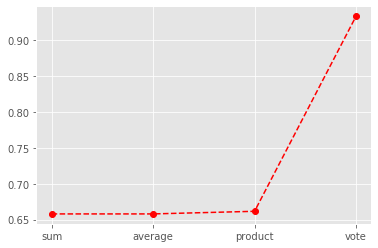

In [60]:
scores = test_scoring_mode(['sum', 'average', 'product', 'vote'])
plt.plot(['sum', 'average', 'product', 'vote'], scores, 'ro--')

In [61]:
scores

[0.6579353385660903,
 0.6579353385660903,
 0.6615969530097494,
 0.9337664612468528]

# Test Different Data Sizes (how much data used)

In [62]:
def test_data(max_data=[]):
    scores = []
    ngram_range, smode, max_lenght, p = (1, 4), "vote", 10, 0.6
    for max_words in tqdm(max_data):
        data = create_dataframe(labels, max_words=max_words)
        data.label.replace([i for i in range(len(labels))], labels, inplace=True)
        trn_df, tst_df = trn_tst(data, p)
        model = Shingle(df=trn_df, ngram_range=ngram_range, smode=smode)
        model.fit(bs=2000)
        tst_df = create_split_dataframe(tst_df, max_lenght)
        x_tst, y_tst = tst_df['text'], tst_df['label']
        scores.append(model.evaluate(x_tst, y_tst)[0])
    return scores

In [63]:
max_data = [1000, 3000, 5000, 9000, 17000, 33000, 65000]
scores = test_data(max_data)

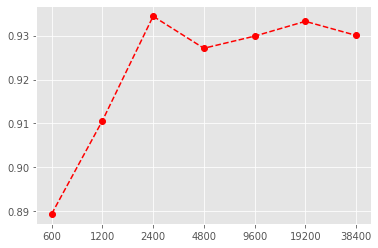

In [67]:
x = list(map(str, [int(i*0.6) for i in max_data]))
plt.plot(x, scores, 'ro--')

# Test Different NGram Ranges

In [72]:
def test_ngram_range(ngram_ranges=[]):
    scores = []
    max_words, max_lenght, p, bs, mode = 5000, 10, 0.6, 3000, 'vote'
    data = create_dataframe(labels, max_words=max_words)
    data.label.replace([i for i in range(len(labels))], labels, inplace=True)
    trn_df, tst_df = trn_tst(data, p)
    tst_df = create_split_dataframe(tst_df, max_lenght)
    x_tst, y_tst = tst_df['text'], tst_df['label']
    for ngram_range in tqdm(ngram_ranges):
        model = Shingle(df=trn_df, ngram_range=ngram_range, smode=mode)
        model.fit(bs=bs)
        scores.append(model.evaluate(x_tst, y_tst)[0])
    return scores

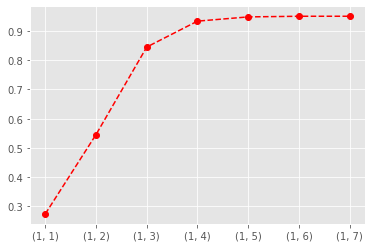

In [79]:
ngram_ranges = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7)]
x = list(map(str, ngram_ranges))
scores = test_ngram_range(ngram_ranges)
plt.plot(x, scores, 'ro--')

In [80]:
scores

[0.2745896751591065,
 0.5457870492319921,
 0.8450008339901717,
 0.9335123238346126,
 0.9480030155290448,
 0.9501945289127266,
 0.9502452763498629]

# Test Lenght of Sentences

In [92]:
def test_lenght(max_lenghts=[]):
    scores = []
    max_words, p, bs, mode = 5000, 0.6, 3000, 'vote'
    data = create_dataframe(labels, max_words=max_words)
    data.label.replace([i for i in range(len(labels))], labels, inplace=True)
    trn_df, tst_df = trn_tst(data, p)
    model = Shingle(df=trn_df, ngram_range=ngram_range, smode=mode)
    model.fit(bs=bs)
    for max_lenght in tqdm(max_lenghts):
        tst_tmp = create_split_dataframe(tst_df, max_lenght)
        x_tst, y_tst = tst_tmp['text'], tst_tmp['label']
        scores.append(model.evaluate(x_tst, y_tst)[0])
    return scores

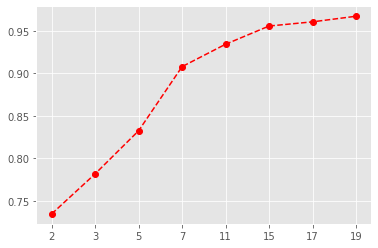

In [94]:
max_lenghts = [2, 3, 5, 7, 11, 15, 17, 19]
x = list(map(str, max_lenghts))
scores = test_lenght(max_lenghts)
plt.plot(x, scores, 'ro--')

In [95]:
scores

[0.7345385187445715,
 0.7817582498189629,
 0.8325461745367221,
 0.9080865697059405,
 0.9344637833583737,
 0.9559094295749198,
 0.9608538349317034,
 0.9674367114577491]